In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import mapclassify
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import Normalize
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go

In [3]:
temperature = pd.read_csv('global_temp_data.csv', encoding='ISO-8859-1')
temperature.replace(to_replace=[-9999, -99], value=np.nan, inplace=True)
temperature.fillna(temperature.mean(), inplace=True)
temperature = temperature.round(2)

C:\Users\rache\AppData\Local\Temp\ipykernel_37164\153652791.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  temperature.fillna(temperature.mean(), inplace=True)


# New Section

In [4]:
temperature_numeric = temperature.select_dtypes(include=[np.number])
temperature_numeric = temperature_numeric[(temperature_numeric > -2) & (temperature_numeric < 2)]

In [5]:
temperature

,Continent,Country,Subregion,1945,1946,1947,1948,1949,1950,1951,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Africa,NaN,NaN,-0.02,0.11,0.29,-0.05,0.04,-0.32,-0.03,...,1.07,1.05,1.28,1.59,1.20,1.17,1.37,1.40,1.37,1.11
1,Africa,Algeria,NaN,0.23,0.27,0.68,0.11,0.00,-0.45,0.20,...,1.14,1.56,1.17,1.79,1.33,1.20,1.11,1.89,2.21,1.83
2,Africa,Angola,NaN,-0.16,0.13,0.00,-0.14,-0.02,-0.34,0.18,...,1.22,0.94,1.58,1.64,1.14,1.53,1.83,1.49,1.42,1.16
3,Africa,Benin,NaN,0.09,0.01,0.43,-0.07,0.41,-0.26,0.03,...,0.99,0.99,1.21,1.40,1.23,1.08,1.30,1.33,1.61,0.99
4,Africa,Burkina Faso,NaN,-0.10,-0.01,0.40,-0.04,0.34,-0.49,0.02,...,0.96,0.90,1.06,1.41,1.19,1.10,1.22,1.31,1.57,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,Oceans,Mediterranean Sea,Aegean Sea,0.02,0.36,0.54,-0.23,-0.85,0.02,0.32,...,0.91,1.09,1.01,1.04,0.60,1.38,1.09,1.16,1.13,0.83
567,Oceans,Mediterranean Sea,Balearic,0.50,0.40,0.54,0.42,0.70,0.63,-0.27,...,0.74,1.23,1.51,1.42,1.66,1.41,1.13,1.49,1.27,2.13
568,Oceans,Mediterranean Sea,Black Sea,-0.28,0.01,0.59,-0.26,-1.04,-0.18,0.46,...,0.91,1.27,1.19,1.17,0.67,1.99,1.17,1.83,1.22,0.92
569,Oceans,Mediterranean Sea,Ligurian Sea,0.71,0.54,0.48,0.33,0.66,0.46,-0.03,...,0.85,1.35,1.85,1.24,1.22,1.85,1.52,1.56,1.47,2.22


In [6]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [7]:
temperature['name'] = temperature['Country'].str.title()
merged = world.merge(temperature, on='name')


In [8]:
melted = merged.melt(
    id_vars=['Continent', 'Country', 'Subregion', 'geometry'],
    var_name='year',
    value_name='temp_anomaly'
)

In [9]:
melted['temp_anomaly'] = pd.to_numeric(melted['temp_anomaly'], errors='coerce')

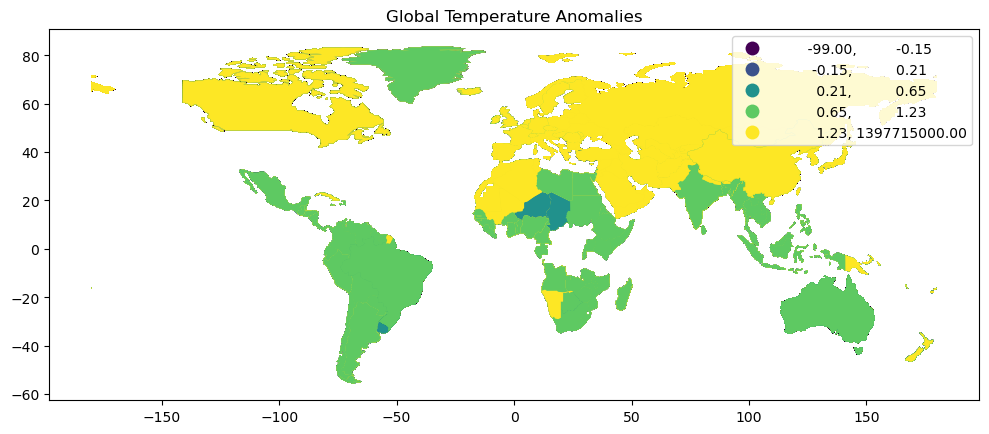

In [10]:
ax = melted.plot(column='temp_anomaly', cmap='viridis', figsize=(12, 10), scheme='quantiles', legend=True)
ax.set_title('Global Temperature Anomalies')
plt.show()

In [15]:
emperor = pd.read_csv('EmperorMigrationRough.csv')
emperor.loc[emperor["Identifier"] != "J91_2003_YK3_5845", "Identifier"] = "J91_2003_YK3_5845"
emperor['Name'] = emperor['Name'].replace('Chen canagica', 'Emperor Goose')
emperor

,Timestamp,Long,Lat,Name,Identifier
0,2003-08-03,-165.093,61.199,Emperor Goose,J91_2003_YK3_5845
1,2003-08-03,-165.029,61.208,Emperor Goose,J91_2003_YK3_5845
2,2003-08-03,-165.105,61.178,Emperor Goose,J91_2003_YK3_5845
3,2003-08-03,-165.103,61.179,Emperor Goose,J91_2003_YK3_5845
4,2003-08-03,-165.069,61.174,Emperor Goose,J91_2003_YK3_5845
...,...,...,...,...,...
25106,2004-07-30,-165.122,61.178,Emperor Goose,J91_2003_YK3_5845
25107,2004-07-30,-165.125,61.171,Emperor Goose,J91_2003_YK3_5845
25108,2004-08-01,-165.130,61.188,Emperor Goose,J91_2003_YK3_5845
25109,2004-08-01,-165.163,61.178,Emperor Goose,J91_2003_YK3_5845


In [17]:
hawk = pd.read_csv('HawkMigrationRough.csv')
hawk.loc[hawk["Identifier"] != "71526a", "Identifier"] = "71526a"
hawk['Name'] = hawk['Name'].replace('Aquila chrysaetos', 'Golden Eagle')
hawk

,Timestamp,Long,Lat,Name,Identifier
0,2008-10-23,-110.5827,42.0568,Golden Eagle,71526a
1,2008-10-24,-110.5883,42.0823,Golden Eagle,71526a
2,2008-10-24,-110.5331,42.5597,Golden Eagle,71526a
3,2008-10-25,-110.7937,42.9237,Golden Eagle,71526a
4,2008-10-27,-110.8648,43.0840,Golden Eagle,71526a
...,...,...,...,...,...
23645,2007-11-28,-107.4270,43.9710,Golden Eagle,71526a
23646,2007-11-28,-107.5410,43.9620,Golden Eagle,71526a
23647,2007-11-30,-107.4260,43.9690,Golden Eagle,71526a
23648,2007-11-30,-107.4310,43.9600,Golden Eagle,71526a


In [18]:
puffin=pd.read_csv('PuffinMigrationRough.csv')
puffin.loc[puffin["Identifier"] != "z", "Identifier"] = 3
puffin['Name'] = puffin['Name'].replace('Fratercula arctica', 'Atlantic Puffin')
puffin

,Timestamp,Long,Lat,Name,Identifier
0,7/17/2007 0:00,-23.23,61.90,Atlantic Puffin,3
1,7/17/2007 12:00,-21.34,61.47,Atlantic Puffin,3
2,7/18/2007 0:00,-29.46,58.78,Atlantic Puffin,3
3,7/18/2007 12:00,-23.07,55.89,Atlantic Puffin,3
4,7/19/2007 12:00,-41.80,48.01,Atlantic Puffin,3
...,...,...,...,...,...
6877,3/11/2008 0:00,-26.49,27.02,Atlantic Puffin,3
6878,3/12/2008 0:00,-28.18,35.74,Atlantic Puffin,3
6879,3/13/2008 0:00,-27.13,90.00,Atlantic Puffin,3
6880,3/14/2008 0:00,-28.44,5.04,Atlantic Puffin,3


In [19]:
herring=pd.read_csv('HerringMigrationRough.csv')
herring.loc[herring["Identifier"] != "z", "Identifier"] = 4
herring['Name'] = herring['Name'].replace('Larus argentatus', 'European Herring Gull')
herring

,Timestamp,Long,Lat,Name,Identifier
0,2013-07-09,-81.80218,64.02047,European Herring Gull,4
1,2013-07-09,-81.79288,64.02810,European Herring Gull,4
2,2013-07-09,-81.78599,64.03082,European Herring Gull,4
3,2013-07-09,-81.80701,64.02631,European Herring Gull,4
4,2013-07-09,-81.79002,64.02982,European Herring Gull,4
...,...,...,...,...,...
28644,2015-02-11,-95.13139,29.09517,European Herring Gull,4
28645,2015-02-11,-95.14207,29.10082,European Herring Gull,4
28646,2015-02-11,-95.13523,29.09635,European Herring Gull,4
28647,2015-02-11,-95.12592,29.09681,European Herring Gull,4


In [20]:
birds = pd.concat([hawk.assign(source=1), emperor.assign(source=2), puffin.assign(source=3), herring.assign(source=4)], keys=[0, 1, 2, 3], ignore_index=True)
birds['Identifier'] = birds['Identifier'].replace({'71526a': 1, 'J91_2003_YK3_5845': 2})
birds

,Timestamp,Long,Lat,Name,Identifier,source
0,2008-10-23,-110.58270,42.05680,Golden Eagle,1,1
1,2008-10-24,-110.58830,42.08230,Golden Eagle,1,1
2,2008-10-24,-110.53310,42.55970,Golden Eagle,1,1
3,2008-10-25,-110.79370,42.92370,Golden Eagle,1,1
4,2008-10-27,-110.86480,43.08400,Golden Eagle,1,1
...,...,...,...,...,...,...
84287,2015-02-11,-95.13139,29.09517,European Herring Gull,4,4
84288,2015-02-11,-95.14207,29.10082,European Herring Gull,4,4
84289,2015-02-11,-95.13523,29.09635,European Herring Gull,4,4
84290,2015-02-11,-95.12592,29.09681,European Herring Gull,4,4


In [23]:
birds['Timestamp'] = pd.to_datetime(birds['Timestamp'])
birds.sort_values('Timestamp', inplace=True)  # make sure data is sorted by time
opacity = birds['Timestamp'].dt.hour / 24  # calculate opacity values
birds

,Timestamp,Long,Lat,Name,Identifier,source
27499,1999-07-28,-165.10000,61.21400,Emperor Goose,2,2
28808,1999-07-28,-165.09400,61.21600,Emperor Goose,2,2
29525,1999-07-28,-165.03100,61.21000,Emperor Goose,2,2
27500,1999-07-28,-165.08900,61.21500,Emperor Goose,2,2
29653,1999-07-28,-165.09100,61.21400,Emperor Goose,2,2
...,...,...,...,...,...,...
79405,2016-11-16,-78.64529,54.92956,European Herring Gull,4,4
79406,2016-11-16,-78.64148,54.93026,European Herring Gull,4,4
79407,2016-11-16,NaN,NaN,European Herring Gull,4,4
79408,2016-11-16,-78.67254,54.91270,European Herring Gull,4,4


In [46]:
# create a scatter mapbox plot
fig = px.scatter_mapbox(birds, lat="Lat", lon="Long", color="Identifier",
                        hover_name="Name", zoom=3, opacity=.1,
                        color_discrete_sequence=px.colors.qualitative.Dark24)

# create line traces for each bird species
for species in birds['Name'].unique().tolist():
    species_df = birds[birds['Name'] == species]
    color_vals = [int(datetime.timestamp(d)) for d in species_df['Timestamp']] # convert datetime objects to timestamps
    fig.add_trace(
        go.Scattermapbox(
            lat=species_df['Lat'],
            lon=species_df['Long'],
            mode='lines',
            line=dict(
                width=3,
                color=color_vals, # use the converted timestamps as the color values
                colorscale='Viridis',
                cmax=int(datetime.timestamp(birds['Timestamp'].max())),
                cmin=int(datetime.timestamp(birds['Timestamp'].min())),
                colorbar=dict(
                    title='Timestamp',
                    thickness=20,
                    len=0.8,
                    x=0.95,
                    xanchor='left',
                    y=0.7
                ),
            ),
            name=species + " Movement"
        )
    )
    
    # add a new trace to show the location of each bird species as markers on the map
    fig.add_trace(
        go.Scattermapbox(
            lat=species_df['Lat'],
            lon=species_df['Long'],
            mode='markers',
            marker=dict(
                color=color_vals,
                colorscale='Rainbow',
                size=10
            ),
            text=species_df['Species'],
            name='Species'
        )
    )

# update the layout with some customization options
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title="Bird sightings and Movement")
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})

# show the plot
fig.show()


ValueError: 
    Invalid value of type 'builtins.list' received for the 'color' property of scattermapbox.line
        Received value: [933134400, 933134400, 933134400, 933134400, 933134400, 933134400, 933134400, 933134400, 933134400, 933134400, 933134400, 933134400, 933134400, 933134400, 933134400, 933134400, 933134400, 933134400, 933134400, 933134400, 933134400, 933134400, 933134400, 933134400, 933134400, 933134400, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933220800, 933307200, 933307200, 933307200, 933307200, 933307200, 933307200, 933307200, 933307200, 933307200, 933307200, 933307200, 933307200, 933307200, 933307200, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933393600, 933480000, 933480000, 933480000, 933480000, 933480000, 933480000, 933480000, 933480000, 933480000, 933480000, 933480000, 933480000, 933480000, 933480000, 933480000, 933480000, 933480000, 933480000, 933480000, 933480000, 933480000, 933480000, 933480000, 933480000, 933480000, 933480000, 933480000, 933480000, 933480000, 933480000, 933480000, 933480000, 933480000, 933480000, 933480000, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933566400, 933652800, 933652800, 933652800, 933652800, 933652800, 933652800, 933652800, 933652800, 933652800, 933652800, 933652800, 933652800, 933652800, 933652800, 933652800, 933652800, 933652800, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933739200, 933825600, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933912000, 933998400, 933998400, 933998400, 933998400, 933998400, 933998400, 933998400, 933998400, 933998400, 933998400, 933998400, 933998400, 933998400, 933998400, 933998400, 933998400, 933998400, 933998400, 933998400, 933998400, 933998400, 933998400, 933998400, 933998400, 933998400, 933998400, 933998400, 934084800, 934084800, 934084800, 934084800, 934084800, 934084800, 934084800, 934084800, 934084800, 934084800, 934084800, 934084800, 934084800, 934084800, 934084800, 934084800, 934084800, 934084800, 934084800, 934084800, 934084800, 934084800, 934084800, 934084800, 934084800, 934084800, 934084800, 934084800, 934084800, 934084800, 934084800, 934084800, 934084800, 934084800, 934084800, 934084800, 934084800, 934084800, 934084800, 934171200, 934171200, 934171200, 934171200, 934171200, 934171200, 934171200, 934171200, 934171200, 934171200, 934171200, 934171200, 934171200, 934171200, 934171200, 934171200, 934171200, 934171200, 934171200, 934171200, 934171200, 934171200, 934171200, 934171200, 934171200, 934171200, 934171200, 934171200, 934171200, 934171200, 934171200, 934171200, 934171200, 934171200, 934171200, 934171200, 934171200, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934257600, 934776000, 934776000, 934776000, 934776000, 934776000, 934776000, 934776000, 934776000, 934776000, 934776000, 934776000, 934776000, 934776000, 934776000, 934776000, 934776000, 934776000, 934776000, 934776000, 934776000, 934776000, 934776000, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934862400, 934948800, 934948800, 934948800, 934948800, 934948800, 934948800, 934948800, 934948800, 934948800, 934948800, 934948800, 934948800, 934948800, 934948800, 934948800, 934948800, 934948800, 934948800, 934948800, 934948800, 934948800, 934948800, 934948800, 935380800, 935380800, 935380800, 935380800, 935380800, 935380800, 935380800, 935380800, 935380800, 935380800, 935380800, 935380800, 935380800, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935467200, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935553600, 935640000, 935640000, 935640000, 935640000, 935640000, 935640000, 935640000, 935640000, 935640000, 935640000, 935640000, 935640000, 935640000, 935640000, 935640000, 935640000, 935640000, 935640000, 935640000, 935640000, 936072000, 936072000, 936072000, 936072000, 936072000, 936072000, 936072000, 936072000, 936072000, 936072000, 936072000, 936072000, 936072000, 936072000, 936072000, 936158400, 936158400, 936158400, 936158400, 936158400, 936158400, 936158400, 936158400, 936158400, 936158400, 936158400, 936158400, 936158400, 936158400, 936158400, 936158400, 936158400, 936158400, 936158400, 936158400, 936158400, 936158400, 936158400, 936158400, 936158400, 936158400, 936158400, 936158400, 936158400, 936158400, 936244800, 936244800, 936244800, 936244800, 936244800, 936244800, 936244800, 936244800, 936244800, 936244800, 936244800, 936244800, 936244800, 936244800, 936244800, 936244800, 936244800, 936244800, 936244800, 936244800, 936244800, 936244800, 936244800, 936244800, 936244800, 936244800, 936244800, 936244800, 936244800, 936244800, 936244800, 936244800, 936244800, 936244800, 936244800, 936244800, 936244800, 936244800, 936331200, 936331200, 936331200, 936331200, 936331200, 936331200, 936331200, 936331200, 936331200, 936331200, 936331200, 936331200, 936331200, 936331200, 936331200, 936676800, 936676800, 936676800, 936676800, 936676800, 936676800, 936676800, 936676800, 936676800, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936763200, 936849600, 936849600, 936849600, 936849600, 936849600, 936849600, 936849600, 936849600, 936849600, 936849600, 936849600, 936849600, 936849600, 936849600, 936849600, 936849600, 936849600, 936849600, 936849600, 936849600, 936849600, 936849600, 936849600, 936849600, 936849600, 936849600, 936849600, 936849600, 936849600, 936849600, 936849600, 936849600, 936849600, 936849600, 936849600, 936936000, 936936000, 936936000, 936936000, 936936000, 936936000, 936936000, 936936000, 936936000, 936936000, 936936000, 936936000, 936936000, 936936000, 936936000, 936936000, 936936000, 936936000, 936936000, 936936000, 936936000, 936936000, 936936000, 936936000, 936936000, 937022400, 937022400, 937022400, 937022400, 937022400, 937022400, 937022400, 937022400, 937022400, 937022400, 937022400, 937022400, 937281600, 937368000, 937368000, 937368000, 937368000, 937368000, 937368000, 937368000, 937368000, 937368000, 937368000, 937368000, 937368000, 937368000, 937368000, 937368000, 937368000, 937368000, 937368000, 937368000, 937368000, 937368000, 937368000, 937368000, 937368000, 937368000, 937368000, 937368000, 937368000, 937368000, 937454400, 937454400, 937454400, 937454400, 937454400, 937454400, 937454400, 937454400, 937454400, 937454400, 937454400, 937454400, 937454400, 937454400, 937454400, 937454400, 937454400, 937454400, 937454400, 937454400, 937454400, 937454400, 937540800, 937540800, 937540800, 937540800, 937540800, 937540800, 937540800, 937540800, 937540800, 937540800, 937540800, 937540800, 937540800, 937540800, 937540800, 937540800, 937540800, 937540800, 937540800, 937540800, 937540800, 937540800, 937627200, 937627200, 937627200, 937627200, 937627200, 937627200, 937627200, 937627200, 937627200, 937627200, 937627200, 937627200, 937627200, 937627200, 937627200, 937627200, 937627200, 937627200, 937627200, 937713600, 937713600, 937972800, 937972800, 937972800, 937972800, 937972800, 937972800, 937972800, 938059200, 938059200, 938059200, 938059200, 938059200, 938059200, 938059200, 938059200, 938145600, 938145600, 938145600, 938145600, 938145600, 938145600, 938145600, 938145600, 938145600, 938145600, 938145600, 938145600, 938145600, 938145600, 938145600, 938145600, 938145600, 938145600, 938145600, 938145600, 938145600, 938145600, 938145600, 938145600, 938145600, 938145600, 938145600, 938145600, 938232000, 938232000, 938232000, 938232000, 938232000, 938318400, 938318400, 938318400, 938318400, 938318400, 938318400, 938318400, 938318400, 938318400, 938318400, 938318400, 938318400, 938318400, 938318400, 938404800, 938404800, 938404800, 938404800, 938404800, 938404800, 938404800, 938577600, 938577600, 938577600, 938664000, 938664000, 938664000, 938664000, 938664000, 938750400, 938750400, 938750400, 938750400, 938750400, 938750400, 938750400, 938750400, 938750400, 938750400, 938750400, 938750400, 938750400, 938750400, 938750400, 938750400, 938750400, 938750400, 938750400, 938750400, 938750400, 938750400, 938750400, 938750400, 938750400, 938750400, 938836800, 938836800, 938836800, 938836800, 938836800, 938836800, 938836800, 938836800, 938836800, 938836800, 938836800, 938836800, 938836800, 938836800, 938836800, 938923200, 938923200, 938923200, 938923200, 938923200, 938923200, 938923200, 939009600, 939009600, 939009600, 939009600, 939009600, 939009600, 939009600, 939009600, 939009600, 939009600, 939009600, 939009600, 939009600, 939096000, 939096000, 939182400, 939182400, 939182400, 939182400, 939182400, 939182400, 939182400, 939182400, 939182400, 939182400, 939182400, 939268800, 939268800, 939355200, 939355200, 939355200, 939355200, 939355200, 939355200, 939355200, 939355200, 939355200, 939355200, 939355200, 939355200, 939355200, 939355200, 939355200, 939355200, 939355200, 939355200, 939355200, 939355200, 939355200, 939355200, 939355200, 939355200, 939355200, 939355200, 939441600, 939441600, 939441600, 939441600, 939441600, 939441600, 939441600, 939441600, 939441600, 939441600, 939441600, 939441600, 939441600, 939441600, 939441600, 939441600, 939528000, 939528000, 939528000, 939528000, 939528000, 939528000, 939528000, 939528000, 939528000, 939528000, 939528000, 939528000, 939528000, 939528000, 939528000, 939528000, 939700800, 939700800, 939700800, 939700800, 939700800, 939700800, 939700800, 939700800, 939700800, 939700800, 939700800, 939700800, 939700800, 939700800, 939787200, 939787200, 939787200, 939787200, 939873600, 939873600, 939873600, 939873600, 939873600, 939873600, 939873600, 939873600, 939873600, 939960000, 939960000, 939960000, 939960000, 939960000, 939960000, 939960000, 940046400, 940046400, 940046400, 940046400, 940046400, 940046400, 940046400, 940046400, 940046400, 940046400, 940046400, 940046400, 940046400, 940046400, 940046400, 940046400, 940046400, 940046400, 940046400, 940046400, 940132800, 940132800, 940132800, 940305600, 940305600, 940305600, 940392000, 940392000, 940392000, 940392000, 940392000, 940392000, 940392000, 940392000, 940478400, 940478400, 940478400, 940478400, 940478400, 940478400, 940478400, 940478400, 940478400, 940478400, 940478400, 940564800, 940564800, 940564800, 940564800, 940564800, 940564800, 940564800, 940564800, 940651200, 940651200, 940651200, 940651200, 940651200, 940651200, 940651200, 940651200, 940651200, 940651200, 940651200, 940651200, 940737600, 940737600, 940737600, 940737600, 940737600, 940737600, 940737600, 940737600, 940737600, 940737600, 940737600, 940737600, 940737600, 940737600, 940737600, 940737600, 940737600, 940737600, 940737600, 940824000, 940824000, 940824000, 940824000, 940824000, 940824000, 940824000, 940824000, 940824000, 940824000, 940824000, 940824000, 940824000, 940996800, 940996800, 940996800, 940996800, 940996800, 940996800, 940996800, 940996800, 940996800, 940996800, 941083200, 941083200, 941083200, 941083200, 941083200, 941169600, 941169600, 941169600, 941169600, 941169600, 941169600, 941169600, 941256000, 941342400, 941342400, 941342400, 941342400, 941342400, 941342400, 941342400, 941342400, 941342400, 941342400, 941342400, 941342400, 941342400, 941342400, 941342400, 941342400, 941342400, 941342400, 941342400, 941342400, 941342400, 941428800, 941428800, 941428800, 941428800, 941428800, 941428800, 941515200, 941515200, 941515200, 941515200, 941515200, 941515200, 941515200, 941515200, 941515200, 941515200, 941515200, 941515200, 941515200, 941515200, 941515200, 941515200, 941688000, 941688000, 941688000, 941688000, 941688000, 941688000, 941688000, 941688000, 941688000, 941688000, 941688000, 941688000, 941688000, 941774400, 941774400, 941774400, 941774400, 941860800, 941860800, 941860800, 941860800, 941860800, 941947200, 941947200, 941947200, 941947200, 941947200, 942037200, 942037200, 942037200, 942037200, 942037200, 942037200, 942037200, 942037200, 942037200, 942037200, 942037200, 942037200, 942037200, 942037200, 942123600, 942123600, 942123600, 942210000, 942210000, 942210000, 942210000, 942210000, 942210000, 942210000, 942382800, 942382800, 942382800, 942382800, 942382800, 942382800, 942382800, 942382800, 942382800, 942382800, 942382800, 942382800, 942382800, 942555600, 942555600, 942555600, 942555600, 942555600, 942555600, 942555600, 942555600, 942555600, 942642000, 942642000, 942642000, 942642000, 942642000, 942642000, 942642000, 942642000, 942642000, 942728400, 942728400, 942728400, 942728400, 942728400, 942728400, 942728400, 942728400, 942728400, 942728400, 942728400, 942728400, 942728400, 942728400, 942728400, 942728400, 942728400, 942728400, 942728400, 942728400, 942728400, 942728400, 942728400, 942728400, 942814800, 942814800, 942814800, 942814800, 942814800, 942901200, 942901200, 942901200, 942901200, 942901200, 942901200, 942901200, 942901200, 942901200, 942901200, 942901200, 942901200, 942901200, 942901200, 942901200, 942901200, 943074000, 943074000, 943074000, 943074000, 943074000, 943074000, 943074000, 943074000, 943074000, 943074000, 943074000, 943074000, 943160400, 943160400, 943160400, 943160400, 943160400, 943160400, 943246800, 943246800, 943246800, 943246800, 943246800, 943246800, 943246800, 943333200, 943333200, 943333200, 943333200, 943333200, 943333200, 943333200, 943333200, 943333200, 943333200, 943333200, 943333200, 943333200, 943333200, 943419600, 943419600, 943419600, 943419600, 943506000, 943506000, 943506000, 943506000, 943506000, 943506000, 943506000, 943506000, 943506000, 943506000, 943506000, 943506000, 943506000, 943506000, 943506000, 943506000, 943506000, 943592400, 943592400, 943592400, 943592400, 943592400, 943678800, 943678800, 943765200, 943765200, 943765200, 943765200, 943765200, 943851600, 943851600, 943851600, 943851600, 943851600, 943938000, 943938000, 943938000, 943938000, 943938000, 943938000, 943938000, 943938000, 944024400, 944024400, 944024400, 944024400, 944024400, 944024400, 944024400, 944024400, 944024400, 944110800, 944110800, 944110800, 944110800, 944110800, 944110800, 944110800, 944197200, 944197200, 944197200, 944197200, 944197200, 944197200, 944197200, 944197200, 944197200, 944197200, 944197200, 944197200, 944197200, 944197200, 944197200, 944197200, 944283600, 944283600, 944370000, 944370000, 944370000, 944456400, 944456400, 944456400, 944456400, 944456400, 944456400, 944456400, 944456400, 944542800, 944542800, 944542800, 944542800, 944629200, 944629200, 944715600, 944715600, 944715600, 944715600, 944715600, 944715600, 944715600, 944715600, 944715600, 944715600, 944715600, 944715600, 944715600, 944715600, 944715600, 944715600, 944715600, 944715600, 944715600, 944715600, 944715600, 944715600, 944715600, 944802000, 944888400, 944888400, 944888400, 944888400, 944888400, 944888400, 944888400, 944888400, 944888400, 944888400, 944888400, 944888400, 944888400, 944888400, 944888400, 944888400, 944888400, 944888400, 944888400, 944888400, 944974800, 944974800, 945061200, 945061200, 945061200, 945147600, 945147600, 945147600, 945147600, 945147600, 945147600, 945234000, 945234000, 945234000, 945234000, 945320400, 945320400, 945320400, 945320400, 945320400, 945320400, 945320400, 945320400, 945320400, 945320400, 945406800, 945406800, 945493200, 945493200, 945493200, 945493200, 945579600, 945579600, 945579600, 945579600, 945579600, 945666000, 945666000, 945666000, 945666000, 945666000, 945752400, 945752400, 945752400, 945752400, 945752400, 945752400, 945752400, 945752400, 945752400, 945752400, 945752400, 945838800, 945838800, 945838800, 945838800, 945925200, 946011600, 946011600, 946011600, 946011600, 946098000, 946098000, 946098000, 946098000, 946098000, 946098000, 946098000, 946184400, 946184400, 946184400, 946184400, 946184400, 946184400, 946184400, 946184400, 946184400, 946270800, 946270800, 946357200, 946357200, 946357200, 946443600, 946443600, 946530000, 946530000, 946530000, 946530000, 946530000, 946530000, 946530000, 946616400, 946616400, 946616400, 946616400, 946616400, 946616400, 946702800, 946702800, 946702800, 946702800, 946702800, 946702800, 946702800, 946702800, 946702800, 946702800, 946702800, 946702800, 946789200, 946789200, 946789200, 946789200, 946789200, 946789200, 946789200, 946789200, 946789200, 946789200, 946875600, 946875600, 946875600, 946875600, 946875600, 946875600, 946875600, 946875600, 946875600, 946875600, 946875600, 946875600, 946962000, 946962000, 946962000, 946962000, 946962000, 946962000, 946962000, 946962000, 947048400, 947048400, 947048400, 947048400, 947048400, 947048400, 947048400, 947134800, 947134800, 947134800, 947134800, 947134800, 947134800, 947134800, 947221200, 947221200, 947221200, 947307600, 947307600, 947307600, 947307600, 947307600, 947307600, 947307600, 947394000, 947394000, 947394000, 947480400, 947480400, 947480400, 947480400, 947480400, 947566800, 947566800, 947566800, 947566800, 947566800, 947566800, 947653200, 947653200, 947653200, 947653200, 947826000, 947826000, 947826000, 947826000, 947826000, 947826000, 947826000, 947826000, 947826000, 947826000, 947826000, 947826000, 947826000, 947826000, 947826000, 947912400, 947912400, 947912400, 947912400, 947912400, 947912400, 947998800, 947998800, 947998800, 947998800, 947998800, 947998800, 948085200, 948085200, 948085200, 948085200, 948171600, 948171600, 948171600, 948171600, 948171600, 948171600, 948258000, 948258000, 948258000, 948258000, 948258000, 948258000, 948258000, 948258000, 948258000, 948258000, 948258000, 948344400, 948344400, 948430800, 948430800, 948430800, 948430800, 948430800, 948430800, 948517200, 948517200, 948517200, 948517200, 948517200, 948517200, 948517200, 948517200, 948517200, 948517200, 948517200, 948517200, 948517200, 948517200, 948517200, 948517200, 948517200, 948517200, 948517200, 948603600, 948690000, 948690000, 948690000, 948690000, 948690000, 948690000, 948690000, 948690000, 948690000, 948690000, 948690000, 948690000, 948690000, 948690000, 948776400, 948776400, 948776400, 948776400, 948776400, 948862800, 948862800, 948862800, 948862800, 948862800, 948862800, 948862800, 948949200, 948949200, 948949200, 948949200, 948949200, 948949200, 948949200, 948949200, 948949200, 948949200, 949122000, 949122000, 949122000, 949122000, 949122000, 949208400, 949208400, 949208400, 949208400, 949208400, 949208400, 949208400, 949208400, 949208400, 949294800, 949294800, 949294800, 949294800, 949294800, 949294800, 949381200, 949381200, 949381200, 949381200, 949381200, 949467600, 949467600, 949554000, 949554000, 949640400, 949640400, 949640400, 949640400, 949640400, 949640400, 949726800, 949726800, 949726800, 949726800, 949813200, 949813200, 949813200, 949813200, 949813200, 949813200, 949813200, 949813200, 949899600, 949986000, 949986000, 949986000, 949986000, 949986000, 949986000, 949986000, 949986000, 949986000, 949986000, 949986000, 949986000, 949986000, 950072400, 950158800, 950158800, 950158800, 950158800, 950158800, 950245200, 950331600, 950331600, 950331600, 950331600, 950331600, 950331600, 950331600, 950331600, 950331600, 950331600, 950418000, 950418000, 950504400, 950504400, 950504400, 950504400, 950504400, 950504400, 950504400, 950504400, 950590800, 950590800, 950677200, 950677200, 950677200, 950677200, 950677200, 950677200, 950677200, 950677200, 950677200, 950677200, 950677200, 950677200, 950677200, 950677200, 950677200, 950677200, 950677200, 950677200, 950677200, 950677200, 950677200, 950677200, 950763600, 950763600, 950763600, 950850000, 950850000, 950850000, 950850000, 950850000, 950850000, 950850000, 950850000, 950936400, 950936400, 950936400, 950936400, 951022800, 951022800, 951022800, 951022800, 951022800, 951022800, 951022800, 951022800, 951109200, 951109200, 951109200, 951109200, 951109200, 951109200, 951109200, 951109200, 951109200, 951109200, 951109200, 951109200, 951109200, 951282000, 951282000, 951282000, 951282000, 951282000, 951282000, 951282000, 951282000, 951282000, 951282000, 951282000, 951282000, 951282000, 951282000, 951282000, 951368400, 951368400, 951368400, 951368400, 951368400, 951368400, 951368400, 951454800, 951454800, 951454800, 951454800, 951454800, 951541200, 951541200, 951541200, 951541200, 951714000, 951714000, 951714000, 951714000, 951800400, 951800400, 951800400, 951800400, 951800400, 951800400, 951800400, 951800400, 951886800, 951886800, 951973200, 951973200, 951973200, 951973200, 951973200, 952059600, 952059600, 952059600, 952059600, 952059600, 952059600, 952146000, 952146000, 952146000, 952146000, 952146000, 952146000, 952146000, 952146000, 952146000, 952146000, 952146000, 952146000, 952146000, 952146000, 952146000, 952146000, 952318800, 952318800, 952405200, 952405200, 952405200, 952405200, 952405200, 952405200, 952405200, 952405200, 952405200, 952491600, 952491600, 952491600, 952578000, 952664400, 952664400, 952664400, 952664400, 952664400, 952664400, 952664400, 952664400, 952664400, 952664400, 952664400, 952664400, 952664400, 952664400, 952750800, 952750800, 952750800, 952750800, 952750800, 952750800, 952837200, 952837200, 952837200, 952837200, 952837200, 952837200, 952837200, 952837200, 952837200, 952837200, 953006400, 953092800, 953092800, 953092800, 953092800, 953179200, 953179200, 953179200, 953179200, 953179200, 953179200, 953179200, 953265600, 953265600, 953265600, 953265600, 953265600, 953265600, 953265600, 953265600, 953265600, 953352000, 953352000, 953352000, 953352000, 953438400, 953438400, 953438400, 953438400, 953438400, 953438400, 953438400, 953438400, 953524800, 953524800, 953524800, 953524800, 953697600, 953697600, 953697600, 953697600, 953697600, 953697600, 953697600, 953697600, 953784000, 953870400, 953870400, 953956800, 953956800, 953956800, 953956800, 953956800, 953956800, 954043200, 954043200, 954043200, 954043200, 954043200, 954043200, 954043200, 954043200, 954043200, 954043200, 954043200, 954043200, 954129600, 954129600, 954129600, 954129600, 954129600, 954129600, 954129600, 954216000, 954216000, 954216000, 954216000, 954216000, 954216000, 954216000, 954216000, 954216000, 954216000, 954216000, 954302400, 954302400, 954302400, 954302400, 954302400, 954302400, 954302400, 954388800, 954388800, 954388800, 954475200, 954475200, 954475200, 954475200, 954561600, 954561600, 954561600, 954561600, 954561600, 954561600, 954561600, 954561600, 954561600, 954561600, 954561600, 954561600, 954561600, 954561600, 954561600, 954561600, 954648000, 954648000, 954648000, 954648000, 954648000, 954648000, 954648000, 954648000, 954648000, 954648000, 954820800, 954820800, 954907200, 954907200, 954907200, 954907200, 954907200, 954907200, 954907200, 954907200, 954907200, 954907200, 954907200, 954993600, 954993600, 954993600, 954993600, 954993600, 954993600, 954993600, 955080000, 955080000, 955080000, 955080000, 955080000, 955166400, 955166400, 955166400, 955166400, 955166400, 955166400, 955166400, 955166400, 955166400, 955166400, 955166400, 955252800, 955252800, 955252800, 955252800, 955252800, 955252800, 955252800, 955252800, 955252800, 955252800, 955252800, 955252800, 955252800, 955252800, 955252800, 955252800, 955339200, 955339200, 955339200, 955339200, 955339200, 955425600, 955425600, 955425600, 955425600, 955425600, 955425600, 955425600, 955425600, 955425600, 955425600, 955425600, 955425600, 955512000, 955512000, 955512000, 955512000, 955512000, 955512000, 955512000, 955512000, 955512000, 955512000, 955512000, 955512000, 955512000, 955512000, 955512000, 955598400, 955598400, 955598400, 955598400, 955598400, 955598400, 955598400, 955598400, 955598400, 955598400, 955598400, 955598400, 955684800, 955684800, 955684800, 955684800, 955684800, 955684800, 955684800, 955684800, 955684800, 955684800, 955684800, 955684800, 955771200, 955771200, 955771200, 955771200, 955771200, 955771200, 955771200, 955771200, 955771200, 955771200, 955771200, 955771200, 955771200, 955771200, 955771200, 955771200, 955771200, 955771200, 955771200, 955771200, 955771200, 955771200, 955771200, 955857600, 955857600, 955857600, 955857600, 955944000, 955944000, 955944000, 955944000, 955944000, 955944000, 956030400, 956030400, 956030400, 956030400, 956030400, 956030400, 956030400, 956030400, 956030400, 956030400, 956030400, 956030400, 956030400, 956116800, 956116800, 956116800, 956116800, 956116800, 956116800, 956116800, 956116800, 956116800, 956116800, 956116800, 956116800, 956203200, 956203200, 956203200, 956203200, 956203200, 956203200, 956203200, 956203200, 956203200, 956203200, 956203200, 956289600, 956289600, 956289600, 956289600, 956289600, 956289600, 956289600, 956289600, 956289600, 956289600, 956289600, 956289600, 956289600, 956376000, 956376000, 956376000, 956376000, 956376000, 956376000, 956376000, 956376000, 956376000, 956376000, 956376000, 956376000, 956376000, 956376000, 956376000, 956376000, 956376000, 956376000, 956376000, 956376000, 956376000, 956462400, 956462400, 956462400, 956462400, 956548800, 956548800, 956548800, 956548800, 956548800, 956548800, 956548800, 956548800, 956548800, 956548800, 956548800, 956548800, 956635200, 956635200, 956635200, 956635200, 956635200, 956635200, 956721600, 956721600, 956721600, 956721600, 956721600, 956721600, 956721600, 956721600, 956721600, 956721600, 956721600, 956721600, 956721600, 956721600, 956721600, 956721600, 956721600, 956721600, 956721600, 956721600, 956721600, 956808000, 956808000, 956808000, 956808000, 956808000, 956808000, 956894400, 956894400, 956894400, 956894400, 956894400, 956894400, 956894400, 956894400, 956894400, 956894400, 956894400, 956894400, 956894400, 956894400, 956980800, 956980800, 956980800, 956980800, 956980800, 956980800, 956980800, 956980800, 956980800, 956980800, 956980800, 956980800, 956980800, 956980800, 956980800, 956980800, 956980800, 956980800, 956980800, 956980800, 956980800, 957067200, 957067200, 957067200, 957067200, 957067200, 957067200, 957067200, 957067200, 957067200, 957153600, 957153600, 957153600, 957153600, 957153600, 957240000, 957240000, 957240000, 957240000, 957240000, 957240000, 957240000, 957240000, 957240000, 957240000, 957240000, 957240000, 957240000, 957240000, 957240000, 957240000, 957240000, 957240000, 957326400, 957326400, 957326400, 957326400, 957326400, 957326400, 957326400, 957326400, 957326400, 957326400, 957326400, 957326400, 957326400, 957326400, 957326400, 957326400, 957326400, 957326400, 957326400, 957326400, 957326400, 957412800, 957412800, 957412800, 957412800, 957412800, 957412800, 957412800, 957412800, 957412800, 957412800, 957412800, 957412800, 957412800, 957412800, 957412800, 957412800, 957412800, 957412800, 957412800, 957412800, 957412800, 957499200, 957499200, 957499200, 957499200, 957499200, 957499200, 957499200, 957585600, 957585600, 957585600, 957585600, 957585600, 957585600, 957585600, 957585600, 957672000, 957672000, 957672000, 957672000, 957672000, 957672000, 957672000, 957672000, 957672000, 957672000, 957672000, 957672000, 957672000, 957672000, 957672000, 957672000, 957672000, 957758400, 957758400, 957758400, 957758400, 957758400, 957758400, 957758400, 957758400, 957758400, 957844800, 957844800, 957844800, 957844800, 957844800, 957844800, 957844800, 957844800, 957844800, 957844800, 957844800, 957844800, 957844800, 957844800, 957844800, 957844800, 957844800, 957931200, 957931200, 957931200, 957931200, 957931200, 957931200, 957931200, 957931200, 957931200, 957931200, 957931200, 957931200, 957931200, 957931200, 957931200, 958017600, 958017600, 958017600, 958017600, 958017600, 958017600, 958017600, 958017600, 958017600, 958017600, 958017600, 958017600, 958017600, 958017600, 958017600, 958017600, 958017600, 958017600, 958017600, 958017600, 958017600, 958017600, 958017600, 958017600, 958104000, 958104000, 958104000, 958104000, 958104000, 958104000, 958104000, 958104000, 958104000, 958104000, 958104000, 958104000, 958104000, 958104000, 958104000, 958104000, 958190400, 958190400, 958190400, 958190400, 958190400, 958190400, 958190400, 958190400, 958190400, 958190400, 958190400, 958190400, 958190400, 958190400, 958190400, 958190400, 958190400, 958190400, 958190400, 958190400, 958190400, 958190400, 958190400, 958190400, 958190400, 958190400, 958190400, 958190400, 958190400, 958190400, 958190400, 958276800, 958276800, 958276800, 958276800, 958276800, 958276800, 958276800, 958276800, 958276800, 958276800, 958276800, 958276800, 958276800, 958276800, 958276800, 958276800, 958363200, 958363200, 958363200, 958363200, 958363200, 958363200, 958363200, 958363200, 958363200, 958363200, 958363200, 958363200, 958363200, 958363200, 958363200, 958363200, 958363200, 958363200, 958363200, 958363200, 958449600, 958449600, 958449600, 958449600, 958449600, 958449600, 958449600, 958449600, 958449600, 958449600, 958449600, 958449600, 958449600, 958449600, 958449600, 958449600, 958449600, 958449600, 958449600, 958449600, 958449600, 958449600, 958449600, 958449600, 958449600, 958449600, 958449600, 958449600, 958449600, 958536000, 958536000, 958536000, 958536000, 958536000, 958536000, 958536000, 958536000, 958536000, 958536000, 958536000, 958536000, 958536000, 958536000, 958622400, 958622400, 958622400, 958622400, 958622400, 958622400, 958622400, 958622400, 958622400, 958622400, 958622400, 958622400, 958622400, 958622400, 958622400, 958622400, 958622400, 958622400, 958708800, 958708800, 958708800, 958708800, 958708800, 958708800, 958708800, 958708800, 958708800, 958708800, 958708800, 958708800, 958708800, 958708800, 958708800, 958795200, 958795200, 958795200, 958795200, 958795200, 958795200, 958795200, 958795200, 958795200, 958795200, 958795200, 958795200, 958795200, 958795200, 958795200, 958795200, 958881600, 958881600, 958881600, 958881600, 958881600, 958881600, 958881600, 958881600, 958881600, 958881600, 958881600, 958881600, 958881600, 958881600, 958881600, 958881600, 958881600, 958881600, 958881600, 958881600, 958881600, 958881600, 958881600, 958881600, 958968000, 958968000, 958968000, 958968000, 958968000, 958968000, 958968000, 958968000, 958968000, 958968000, 958968000, 958968000, 958968000, 958968000, 958968000, 958968000, 958968000, 958968000, 958968000, 958968000, 958968000, 958968000, 959054400, 959054400, 959054400, 959054400, 959054400, 959054400, 959054400, 959054400, 959054400, 959054400, 959054400, 959054400, 959054400, 959054400, 959054400, 959054400, 959054400, 959054400, 959054400, 959054400, 959054400, 959054400, 959054400, 959054400, 959054400, 959054400, 959054400, 959140800, 959140800, 959140800, 959140800, 959140800, 959140800, 959140800, 959140800, 959140800, 959140800, 959140800, 959140800, 959140800, 959140800, 959140800, 959140800, 959140800, 959140800, 959140800, 959140800, 959140800, 959140800, 959227200, 959227200, 959227200, 959227200, 959227200, 959227200, 959227200, 959227200, 959227200, 959227200, 959227200, 959313600, 959313600, 959313600, 959313600, 959313600, 959313600, 959313600, 959313600, 959313600, 959313600, 959313600, 959313600, 959313600, 959313600, 959313600, 959313600, 959313600, 959313600, 959313600, 959313600, 959313600, 959313600, 959313600, 959313600, 959313600, 959400000, 959400000, 959400000, 959400000, 959400000, 959400000, 959400000, 959400000, 959400000, 959400000, 959400000, 959400000, 959400000, 959400000, 959400000, 959400000, 959400000, 959400000, 959486400, 959486400, 959486400, 959486400, 959486400, 959486400, 959486400, 959486400, 959486400, 959486400, 959486400, 959486400, 959486400, 959486400, 959486400, 959486400, 959486400, 959486400, 959486400, 959486400, 959486400, 959572800, 959572800, 959572800, 959572800, 959572800, 959572800, 959572800, 959572800, 959572800, 959572800, 959572800, 959659200, 959659200, 959659200, 959659200, 959659200, 959659200, 959659200, 959659200, 959659200, 959659200, 959659200, 959659200, 959659200, 959659200, 959659200, 959659200, 959659200, 959659200, 959659200, 959659200, 959659200, 959659200, 959659200, 959659200, 959659200, 959659200, 959659200, 959745600, 959745600, 959745600, 959745600, 959745600, 959745600, 959745600, 959745600, 959745600, 959832000, 959832000, 959832000, 959832000, 959832000, 959832000, 959832000, 959832000, 959832000, 959832000, 959832000, 959832000, 959832000, 959832000, 959832000, 959832000, 959832000, 959832000, 959832000, 959832000, 959832000, 959832000, 959832000, 959832000, 959832000, 959832000, 959918400, 959918400, 959918400, 959918400, 959918400, 959918400, 959918400, 960004800, 960004800, 960004800, 960004800, 960004800, 960004800, 960004800, 960004800, 960004800, 960004800, 960004800, 960004800, 960004800, 960004800, 960004800, 960004800, 960004800, 960004800, 960004800, 960004800, 960004800, 960091200, 960091200, 960091200, 960091200, 960091200, 960091200, 960091200, 960091200, 960091200, 960091200, 960091200, 960091200, 960091200, 960091200, 960177600, 960177600, 960177600, 960177600, 960177600, 960177600, 960177600, 960177600, 960177600, 960177600, 960177600, 960264000, 960264000, 960264000, 960264000, 960264000, 960264000, 960264000, 960264000, 960264000, 960264000, 960264000, 960264000, 960264000, 960264000, 960350400, 960350400, 960350400, 960350400, 960350400, 960350400, 960350400, 960350400, 960350400, 960350400, 960350400, 960350400, 960350400, 960350400, 960350400, 960350400, 960350400, 960350400, 960350400, 960350400, 960350400, 960350400, 960350400, 960350400, 960350400, 960350400, 960436800, 960436800, 960436800, 960436800, 960436800, 960436800, 960436800, 960436800, 960436800, 960436800, 960436800, 960436800, 960436800, 960523200, 960523200, 960523200, 960523200, 960523200, 960523200, 960523200, 960523200, 960523200, 960523200, 960523200, 960523200, 960523200, 960523200, 960523200, 960609600, 960609600, 960609600, 960609600, 960609600, 960609600, 960609600, 960609600, 960609600, 960609600, 960609600, 960609600, 960609600, 960609600, 960609600, 960609600, 960609600, 960609600, 960609600, 960696000, 960696000, 960696000, 960696000, 960696000, 960696000, 960696000, 960696000, 960696000, 960696000, 960696000, 960696000, 960696000, 960696000, 960696000, 960696000, 960696000, 960696000, 960782400, 960782400, 960782400, 960782400, 960782400, 960782400, 960782400, 960782400, 960782400, 960782400, 960782400, 960782400, 960782400, 960782400, 960782400, 960782400, 960782400, 960782400, 960782400, 960782400, 960782400, 960782400, 960868800, 960868800, 960868800, 960868800, 960868800, 960868800, 960868800, 960868800, 960868800, 960868800, 960868800, 960868800, 960868800, 960868800, 960868800, 960868800, 960868800, 960955200, 960955200, 960955200, 960955200, 960955200, 960955200, 960955200, 960955200, 960955200, 960955200, 960955200, 961041600, 961041600, 961041600, 961041600, 961041600, 961041600, 961041600, 961041600, 961041600, 961041600, 961041600, 961041600, 961041600, 961041600, 961041600, 961041600, 961041600, 961041600, 961041600, 961128000, 961128000, 961128000, 961128000, 961128000, 961128000, 961128000, 961128000, 961128000, 961128000, 961128000, 961128000, 961128000, 961128000, 961128000, 961128000, 961128000, 961214400, 961214400, 961214400, 961214400, 961214400, 961214400, 961214400, 961214400, 961214400, 961214400, 961214400, 961214400, 961214400, 961214400, 961214400, 961214400, 961214400, 961300800, 961300800, 961300800, 961300800, 961300800, 961300800, 961300800, 961300800, 961300800, 961300800, 961300800, 961300800, 961300800, 961300800, 961300800, 961300800, 961300800, 961300800, 961300800, 961300800, 961300800, 961300800, 961387200, 961387200, 961387200, 961387200, 961387200, 961387200, 961387200, 961387200, 961387200, 961387200, 961387200, 961387200, 961387200, 961387200, 961387200, 961387200, 961387200, 961387200, 961387200, 961473600, 961473600, 961473600, 961473600, 961473600, 961473600, 961473600, 961473600, 961473600, 961473600, 961473600, 961473600, 961473600, 961473600, 961473600, 961473600, 961473600, 961473600, 961473600, 961473600, 961560000, 961560000, 961560000, 961560000, 961560000, 961560000, 961560000, 961560000, 961560000, 961560000, 961560000, 961646400, 961646400, 961646400, 961646400, 961646400, 961646400, 961646400, 961646400, 961646400, 961646400, 961646400, 961646400, 961646400, 961646400, 961646400, 961646400, 961646400, 961646400, 961646400, 961732800, 961732800, 961732800, 961732800, 961732800, 961732800, 961732800, 961732800, 961732800, 961732800, 961732800, 961732800, 961819200, 961819200, 961819200, 961819200, 961819200, 961819200, 961819200, 961819200, 961819200, 961819200, 961819200, 961819200, 961819200, 961819200, 961819200, 961905600, 961905600, 961905600, 961905600, 961905600, 961905600, 961905600, 961905600, 961905600, 961905600, 961992000, 961992000, 961992000, 961992000, 961992000, 961992000, 961992000, 961992000, 961992000, 961992000, 961992000, 961992000, 961992000, 961992000, 961992000, 961992000, 961992000, 961992000, 961992000, 961992000, 961992000, 961992000, 961992000, 961992000, 961992000, 962078400, 962078400, 962078400, 962078400, 962078400, 962078400, 962078400, 962078400, 962078400, 962164800, 962164800, 962164800, 962164800, 962164800, 962164800, 962164800, 962164800, 962164800, 962164800, 962164800, 962164800, 962164800, 962164800, 962164800, 962164800, 962164800, 962164800, 962164800, 962164800, 962164800, 962164800, 962164800, 962164800, 962251200, 962251200, 962251200, 962251200, 962251200, 962251200, 962251200, 962251200, 962251200, 962251200, 962251200, 962337600, 962337600, 962337600, 962337600, 962337600, 962337600, 962424000, 962424000, 962424000, 962424000, 962424000, 962424000, 962424000, 962424000, 962424000, 962424000, 962424000, 962424000, 962424000, 962424000, 962424000, 962424000, 962424000, 962424000, 962424000, 962424000, 962510400, 962510400, 962510400, 962510400, 962510400, 962510400, 962510400, 962510400, 962510400, 962510400, 962510400, 962510400, 962510400, 962510400, 962510400, 962510400, 962510400, 962510400, 962510400, 962596800, 962596800, 962596800, 962596800, 962596800, 962596800, 962596800, 962596800, 962596800, 962683200, 962683200, 962683200, 962683200, 962683200, 962683200, 962683200, 962683200, 962683200, 962683200, 962683200, 962683200, 962683200, 962683200, 962683200, 962683200, 962769600, 962769600, 962769600, 962769600, 962769600, 962769600, 962769600, 962769600, 962769600, 962769600, 962856000, 962856000, 962856000, 962856000, 962856000, 962856000, 962856000, 962856000, 962942400, 962942400, 962942400, 962942400, 962942400, 962942400, 962942400, 962942400, 962942400, 962942400, 962942400, 962942400, 962942400, 962942400, 963028800, 963028800, 963028800, 963028800, 963115200, 963115200, 963115200, 963115200, 963115200, 963115200, 963115200, 963115200, 963201600, 963201600, 963288000, 963288000, 963288000, 963288000, 963288000, 963288000, 963288000, 963288000, 963288000, 963288000, 963374400, 963374400, 963374400, 963374400, 963374400, 963374400, 963374400, 963460800, 963460800, 963460800, 963460800, 963460800, 963460800, 963460800, 963547200, 963547200, 963547200, 963547200, 963547200, 963547200, 963547200, 963633600, 963633600, 963633600, 963633600, 963633600, 963633600, 963633600, 963633600, 963633600, 963633600, 963633600, 963806400, 963806400, 963806400, 963806400, 963806400, 963806400, 963806400, 963806400, 963806400, 963806400, 963806400, 963806400, 963892800, 963892800, 963892800, 963892800, 963892800, 963892800, 963892800, 963979200, 963979200, 963979200, 963979200, 963979200, 963979200, 963979200, 963979200, 963979200, 963979200, 964065600, 964065600, 964065600, 964065600, 964152000, 964152000, 964152000, 964152000, 964152000, 964152000, 964238400, 964238400, 964238400, 964238400, 964238400, 964324800, 964324800, 964324800, 964324800, 964324800, 964324800, 964324800, 964324800, 964324800, 964324800, 964411200, 964411200, 964497600, 964497600, 964497600, 964497600, 964497600, 964497600, 964497600, 964497600, 964497600, 964584000, 964670400, 964670400, 964670400, 964670400, 964670400, 964670400, 964670400, 964670400, 964670400, 964670400, 964670400, 964670400, 964756800, 964756800, 964756800, 964756800, 964756800, 964756800, 964843200, 964843200, 964843200, 964843200, 964843200, 964929600, 964929600, 964929600, 964929600, 964929600, 964929600, 965016000, 965016000, 965016000, 965016000, 965016000, 965016000, 965016000, 965102400, 965188800, 965188800, 965275200, 965275200, 965275200, 965448000, 965448000, 965448000, 965448000, 965448000, 965448000, 965448000, 965534400, 965534400, 965534400, 965534400, 965534400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027742400, 1027828800, 1027828800, 1027828800, 1027828800, 1027828800, 1027828800, 1027828800, 1027828800, 1027828800, 1027828800, 1027828800, 1027828800, 1027828800, 1027828800, 1027828800, 1027828800, 1027828800, 1027828800, 1027828800, 1027828800, 1027828800, 1027828800, 1027828800, 1027828800, 1027828800, 1027828800, 1027828800, 1027828800, 1027828800, 1027828800, 1027828800, 1027828800, 1027828800, 1027828800, 1027828800, 1027828800, 1027828800, 1028260800, 1028260800, 1028260800, 1028260800, 1028260800, 1028260800, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028347200, 1028433600, 1028433600, 1028433600, 1028433600, 1028433600, 1028433600, 1028433600, 1028433600, 1028433600, 1028433600, 1028433600, 1028433600, 1028433600, 1028433600, 1028433600, 1028433600, 1028433600, 1028433600, 1028433600, 1028433600, 1028433600, 1028433600, 1028433600, 1028433600, 1028433600, 1028433600, 1028433600, 1028433600, 1028433600, 1028433600, 1028433600, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028606400, 1028692800, 1028692800, 1028692800, 1028692800, 1028692800, 1028692800, 1028692800, 1028692800, 1028692800, 1028692800, 1028692800, 1028692800, 1028692800, 1028865600, 1028865600, 1028865600, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1028952000, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029038400, 1029211200, 1029211200, 1029211200, 1029297600, 1029297600, 1029297600, 1029297600, 1029297600, 1029297600, 1029297600, 1029297600, 1029297600, 1029297600, 1029297600, 1029297600, 1029297600, 1029297600, 1029297600, 1029297600, 1029297600, 1029297600, 1029297600, 1029297600, 1029297600, 1029297600, 1029297600, 1029297600, 1029297600, 1029297600, 1029297600, 1029297600, 1029297600, 1029297600, 1029297600, 1029297600, 1029297600, 1029297600, 1029297600, 1029297600, 1029297600, 1029297600, 1029470400, 1029470400, 1029470400, 1029470400, 1029470400, 1029470400, 1029470400, 1029470400, 1029470400, 1029470400, 1029470400, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029556800, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029643200, 1029729600, 1029729600, 1029729600, 1029729600, 1029729600, 1029729600, 1029729600, 1029729600, 1029729600, 1029729600, 1029902400, 1029902400, 1029902400, 1029902400, 1029902400, 1029902400, 1029902400, 1029902400, 1029902400, 1029902400, 1029902400, 1029902400, 1029902400, 1029902400, 1029902400, 1029902400, 1029902400, 1029902400, 1029902400, 1029902400, 1029902400, 1029902400, 1029902400, 1029902400, 1029902400, 1029902400, 1029902400, 1029902400, 1029902400, 1029902400, 1029902400, 1029902400, 1029902400, 1029988800, 1029988800, 1029988800, 1029988800, 1029988800, 1029988800, 1029988800, 1029988800, 1029988800, 1029988800, 1029988800, 1029988800, 1029988800, 1029988800, 1029988800, 1029988800, 1029988800, 1029988800, 1029988800, 1029988800, 1029988800, 1029988800, 1029988800, 1029988800, 1029988800, 1029988800, 1029988800, 1030075200, 1030075200, 1030075200, 1030075200, 1030075200, 1030075200, 1030075200, 1030075200, 1030075200, 1030075200, 1030075200, 1030075200, 1030075200, 1030075200, 1030075200, 1030075200, 1030075200, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030161600, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030248000, 1030334400, 1030334400, 1030334400, 1030334400, 1030334400, 1030334400, 1030334400, 1030334400, 1030334400, 1030334400, 1030334400, 1030334400, 1030334400, 1030334400, 1030334400, 1030334400, 1030334400, 1030334400, 1030334400, 1030334400, 1030334400, 1030334400, 1030334400, 1030334400, 1030334400, 1030334400, 1030334400, 1030334400, 1030507200, 1030507200, 1030507200, 1030507200, 1030507200, 1030507200, 1030507200, 1030507200, 1030593600, 1030593600, 1030593600, 1030593600, 1030593600, 1030593600, 1030593600, 1030593600, 1030593600, 1030593600, 1030593600, 1030593600, 1030593600, 1030593600, 1030593600, 1030593600, 1030593600, 1030593600, 1030593600, 1030593600, 1030593600, 1030593600, 1030593600, 1030593600, 1030593600, 1030680000, 1030680000, 1030680000, 1030680000, 1030680000, 1030680000, 1030680000, 1030680000, 1030680000, 1030680000, 1030680000, 1030680000, 1030680000, 1030680000, 1030680000, 1030680000, 1030680000, 1030680000, 1030680000, 1030680000, 1030680000, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030766400, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030852800, 1030939200, 1030939200, 1030939200, 1030939200, 1030939200, 1030939200, 1030939200, 1030939200, 1030939200, 1030939200, 1030939200, 1030939200, 1030939200, 1030939200, 1030939200, 1030939200, 1030939200, 1030939200, 1030939200, 1030939200, 1030939200, 1030939200, 1030939200, 1030939200, 1030939200, 1030939200, 1030939200, 1030939200, 1030939200, 1030939200, 1030939200, 1030939200, 1031025600, 1031112000, 1031112000, 1031112000, 1031198400, 1031198400, 1031198400, 1031198400, 1031198400, 1031198400, 1031198400, 1031198400, 1031198400, 1031198400, 1031198400, 1031284800, 1031284800, 1031284800, 1031284800, 1031284800, 1031284800, 1031284800, 1031284800, 1031284800, 1031284800, 1031284800, 1031284800, 1031284800, 1031284800, 1031284800, 1031284800, 1031284800, 1031284800, 1031284800, 1031284800, 1031284800, 1031284800, 1031284800, 1031284800, 1031284800, 1031284800, 1031284800, 1031284800, 1031284800, 1031284800, 1031284800, 1031371200, 1031371200, 1031371200, 1031371200, 1031371200, 1031371200, 1031371200, 1031371200, 1031371200, 1031371200, 1031371200, 1031371200, 1031371200, 1031371200, 1031371200, 1031371200, 1031371200, 1031371200, 1031371200, 1031371200, 1031371200, 1031371200, 1031371200, 1031371200, 1031371200, 1031371200, 1031457600, 1031457600, 1031457600, 1031457600, 1031457600, 1031457600, 1031457600, 1031457600, 1031457600, 1031457600, 1031457600, 1031457600, 1031457600, 1031457600, 1031457600, 1031457600, 1031457600, 1031457600, 1031457600, 1031457600, 1031457600, 1031457600, 1031457600, 1031457600, 1031457600, 1031457600, 1031457600, 1031457600, 1031457600, 1031457600, 1031457600, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031544000, 1031630400, 1031630400, 1031630400, 1031630400, 1031630400, 1031630400, 1031630400, 1031630400, 1031716800, 1031716800, 1031716800, 1031716800, 1031803200, 1031803200, 1031803200, 1031803200, 1031803200, 1031803200, 1031803200, 1031803200, 1031803200, 1031889600, 1031889600, 1031889600, 1031889600, 1031889600, 1031889600, 1031889600, 1031889600, 1031889600, 1031889600, 1031889600, 1031889600, 1031889600, 1031889600, 1031889600, 1031889600, 1031889600, 1031889600, 1031889600, 1031889600, 1031889600, 1031889600, 1031976000, 1031976000, 1031976000, 1031976000, 1031976000, 1031976000, 1031976000, 1031976000, 1031976000, 1031976000, 1031976000, 1031976000, 1031976000, 1031976000, 1031976000, 1031976000, 1031976000, 1031976000, 1031976000, 1031976000, 1031976000, 1031976000, 1031976000, 1031976000, 1031976000, 1031976000, 1032062400, 1032062400, 1032062400, 1032062400, 1032062400, 1032062400, 1032062400, 1032062400, 1032062400, 1032062400, 1032062400, 1032062400, 1032062400, 1032062400, 1032062400, 1032062400, 1032062400, 1032062400, 1032062400, 1032062400, 1032062400, 1032062400, 1032148800, 1032148800, 1032148800, 1032148800, 1032148800, 1032148800, 1032148800, 1032148800, 1032148800, 1032148800, 1032148800, 1032148800, 1032148800, 1032148800, 1032148800, 1032148800, 1032148800, 1032235200, 1032235200, 1032235200, 1032235200, 1032235200, 1032235200, 1032235200, 1032235200, 1032235200, 1032235200, 1032235200, 1032235200, 1032235200, 1032235200, 1032235200, 1032321600, 1032321600, 1032321600, 1032321600, 1032321600, 1032321600, 1032321600, 1032321600, 1032408000, 1032408000, 1032494400, 1032494400, 1032494400, 1032494400, 1032494400, 1032494400, 1032494400, 1032494400, 1032494400, 1032494400, 1032494400, 1032494400, 1032494400, 1032494400, 1032494400, 1032494400, 1032494400, 1032494400, 1032494400, 1032494400, 1032494400, 1032494400, 1032494400, 1032494400, 1032494400, 1032580800, 1032580800, 1032580800, 1032580800, 1032580800, 1032580800, 1032580800, 1032580800, 1032580800, 1032580800, 1032580800, 1032580800, 1032580800, 1032580800, 1032580800, 1032580800, 1032580800, 1032580800, 1032580800, 1032580800, 1032580800, 1032580800, 1032580800, 1032580800, 1032580800, 1032580800, 1032580800, 1032580800, 1032580800, 1032580800, 1032580800, 1032580800, 1032580800, 1032580800, 1032580800, 1032667200, 1032667200, 1032667200, 1032667200, 1032667200, 1032667200, 1032667200, 1032667200, 1032667200, 1032667200, 1032667200, 1032667200, 1032667200, 1032667200, 1032667200, 1032667200, 1032667200, 1032667200, 1032667200, 1032667200, 1032667200, 1032667200, 1032667200, 1032667200, 1032667200, 1032667200, 1032667200, 1032667200, 1032667200, 1032667200, 1032667200, 1032753600, 1032753600, 1032753600, 1032753600, 1032753600, 1032753600, 1032840000, 1032840000, 1032840000, 1032840000, 1032840000, 1032840000, 1032840000, 1032840000, 1032840000, 1032840000, 1032840000, 1032840000, 1032840000, 1032840000, 1032840000, 1032840000, 1032840000, 1032840000, 1032926400, 1032926400, 1032926400, 1032926400, 1032926400, 1032926400, 1032926400, 1032926400, 1032926400, 1033012800, 1033012800, 1033012800, 1033012800, 1033012800, 1033012800, 1033012800, 1033012800, 1033012800, 1033012800, 1033012800, 1033012800, 1033012800, 1033012800, 1033099200, 1033099200, 1033099200, 1033099200, 1033099200, 1033099200, 1033099200, 1033099200, 1033099200, 1033099200, 1033099200, 1033099200, 1033099200, 1033099200, 1033099200, 1033099200, 1033099200, 1033099200, 1033099200, 1033099200, 1033099200, 1033099200, 1033099200, 1033099200, 1033099200, 1033099200, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033185600, 1033272000, 1033272000, 1033272000, 1033272000, 1033272000, 1033272000, 1033272000, 1033272000, 1033272000, 1033272000, 1033272000, 1033272000, 1033272000, 1033272000, 1033272000, 1033272000, 1033272000, 1033272000, 1033272000, 1033272000, 1033272000, 1033272000, 1033272000, 1033358400, 1033358400, 1033358400, 1033358400, 1033358400, 1033358400, 1033358400, 1033444800, 1033444800, 1033444800, 1033444800, 1033444800, 1033444800, 1033444800, 1033444800, 1033444800, 1033444800, 1033444800, 1033444800, 1033531200, 1033531200, 1033531200, 1033531200, 1033531200, 1033531200, 1033531200, 1033531200, 1033531200, 1033531200, 1033531200, 1033531200, 1033531200, 1033531200, 1033531200, 1033531200, 1033617600, 1033617600, 1033617600, 1033617600, 1033617600, 1033617600, 1033617600, 1033617600, 1033617600, 1033617600, 1033617600, 1033617600, 1033617600, 1033617600, 1033704000, 1033704000, 1033704000, 1033704000, 1033704000, 1033704000, 1033704000, 1033704000, 1033704000, 1033704000, 1033704000, 1033704000, 1033704000, 1033704000, 1033704000, 1033704000, 1033704000, 1033704000, 1033704000, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033790400, 1033876800, 1033876800, 1033876800, 1033876800, 1033876800, 1033876800, 1033876800, 1033876800, 1033876800, 1033876800, 1033876800, 1033876800, 1033876800, 1033876800, 1033876800, 1033876800, 1033876800, 1033876800, 1033876800, 1033876800, 1033876800, 1033876800, 1033963200, 1033963200, 1033963200, 1033963200, 1033963200, 1033963200, 1033963200, 1033963200, 1033963200, 1033963200, 1034049600, 1034049600, 1034049600, 1034049600, 1034049600, 1034049600, 1034049600, 1034049600, 1034049600, 1034049600, 1034049600, 1034049600, 1034049600, 1034049600, 1034136000, 1034136000, 1034136000, 1034136000, 1034136000, 1034136000, 1034136000, 1034136000, 1034136000, 1034136000, 1034136000, 1034136000, 1034222400, 1034222400, 1034222400, 1034222400, 1034222400, 1034222400, 1034222400, 1034222400, 1034222400, 1034222400, 1034222400, 1034222400, 1034222400, 1034308800, 1034308800, 1034308800, 1034308800, 1034308800, 1034308800, 1034308800, 1034308800, 1034308800, 1034308800, 1034308800, 1034308800, 1034308800, 1034308800, 1034308800, 1034308800, 1034308800, 1034308800, 1034308800, 1034308800, 1034308800, 1034308800, 1034308800, 1034308800, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034395200, 1034481600, 1034481600, 1034481600, 1034481600, 1034481600, 1034481600, 1034481600, 1034481600, 1034481600, 1034481600, 1034481600, 1034481600, 1034481600, 1034481600, 1034481600, 1034481600, 1034481600, 1034481600, 1034481600, 1034481600, 1034481600, 1034481600, 1034568000, 1034568000, 1034568000, 1034568000, 1034568000, 1034568000, 1034568000, 1034568000, 1034568000, 1034568000, 1034568000, 1034654400, 1034654400, 1034654400, 1034654400, 1034654400, 1034740800, 1034740800, 1034740800, 1034740800, 1034740800, 1034740800, 1034740800, 1034740800, 1034740800, 1034740800, 1034740800, 1034740800, 1034740800, 1034740800, 1034740800, 1034740800, 1034740800, 1034740800, 1034740800, 1034740800, 1034740800, 1034740800, 1034740800, 1034740800, 1034827200, 1034827200, 1034827200, 1034827200, 1034827200, 1034827200, 1034827200, 1034827200, 1034827200, 1034827200, 1034827200, 1034827200, 1034827200, 1034827200, 1034827200, 1034827200, 1034827200, 1034827200, 1034913600, 1034913600, 1034913600, 1034913600, 1034913600, 1034913600, 1034913600, 1034913600, 1034913600, 1034913600, 1034913600, 1034913600, 1034913600, 1034913600, 1034913600, 1034913600, 1034913600, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035000000, 1035086400, 1035086400, 1035086400, 1035086400, 1035086400, 1035086400, 1035086400, 1035086400, 1035086400, 1035086400, 1035086400, 1035086400, 1035086400, 1035086400, 1035086400, 1035086400, 1035086400, 1035086400, 1035086400, 1035086400, 1035086400, 1035172800, 1035172800, 1035172800, 1035172800, 1035172800, 1035172800, 1035172800, 1035172800, 1035172800, 1035172800, 1035172800, 1035172800, 1035172800, 1035172800, 1035172800, 1035172800, 1035172800, 1035172800, 1035172800, 1035172800, 1035172800, 1035172800, 1035172800, 1035345600, 1035345600, 1035345600, 1035345600, 1035345600, 1035345600, 1035345600, 1035345600, 1035345600, 1035345600, 1035345600, 1035345600, 1035345600, 1035345600, 1035345600, 1035345600, 1035345600, 1035345600, 1035345600, 1035432000, 1035432000, 1035432000, 1035432000, 1035432000, 1035432000, 1035432000, 1035432000, 1035432000, 1035432000, 1035432000, 1035432000, 1035432000, 1035518400, 1035518400, 1035518400, 1035518400, 1035518400, 1035518400, 1035518400, 1035518400, 1035518400, 1035518400, 1035518400, 1035518400, 1035518400, 1035518400, 1035518400, 1035518400, 1035518400, 1035518400, 1035518400, 1035518400, 1035518400, 1035518400, 1035518400, 1035604800, 1035604800, 1035604800, 1035604800, 1035604800, 1035604800, 1035604800, 1035604800, 1035604800, 1035604800, 1035604800, 1035604800, 1035604800, 1035604800, 1035604800, 1035604800, 1035604800, 1035604800, 1035604800, 1035604800, 1035604800, 1035604800, 1035604800, 1035604800, 1035604800, 1035604800, 1035604800, 1035604800, 1035604800, 1035691200, 1035691200, 1035691200, 1035691200, 1035691200, 1035691200, 1035691200, 1035691200, 1035691200, 1035691200, 1035691200, 1035691200, 1035691200, 1035691200, 1035691200, 1035691200, 1035691200, 1035691200, 1035691200, 1035691200, 1035691200, 1035691200, 1035691200, 1035691200, 1035691200, 1035691200, 1035691200, 1035691200, 1035691200, 1035691200, 1035691200, 1035691200, 1035691200, 1035691200, 1035777600, 1035777600, 1035777600, 1035777600, 1035777600, 1035777600, 1035777600, 1035777600, 1035777600, 1035777600, 1035777600, 1035777600, 1035864000, 1035864000, 1035864000, 1035864000, 1035864000, 1035864000, 1035864000, 1035864000, 1035950400, 1035950400, 1035950400, 1035950400, 1035950400, 1035950400, 1035950400, 1035950400, 1035950400, 1035950400, 1035950400, 1035950400, 1036036800, 1036036800, 1036036800, 1036036800, 1036036800, 1036036800, 1036036800, 1036036800, 1036036800, 1036036800, 1036036800, 1036036800, 1036036800, 1036036800, 1036036800, 1036036800, 1036036800, 1036036800, 1036036800, 1036036800, 1036036800, 1036036800, 1036036800, 1036036800, 1036036800, 1036036800, 1036036800, 1036036800, 1036036800, 1036123200, 1036123200, 1036123200, 1036123200, 1036123200, 1036123200, 1036123200, 1036123200, 1036123200, 1036123200, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036209600, 1036296000, 1036296000, 1036296000, 1036296000, 1036296000, 1036296000, 1036296000, 1036296000, 1036296000, 1036296000, 1036296000, 1036296000, 1036296000, 1036296000, 1036296000, 1036296000, 1036296000, 1036296000, 1036296000, 1036296000, 1036296000, 1036296000, 1036296000, 1036296000, 1036386000, 1036386000, 1036386000, 1036386000, 1036386000, 1036386000, 1036386000, 1036386000, 1036386000, 1036386000, 1036386000, 1036386000, 1036386000, 1036386000, 1036386000, 1036472400, 1036472400, 1036472400, 1036472400, 1036472400, 1036472400, 1036472400, 1036472400, 1036472400, 1036472400, 1036472400, 1036472400, 1036472400, 1036558800, 1036558800, 1036558800, 1036558800, 1036558800, 1036645200, 1036645200, 1036645200, 1036645200, 1036645200, 1036645200, 1036645200, 1036645200, 1036645200, 1036645200, 1036645200, 1036645200, 1036645200, 1036645200, 1036645200, 1036645200, 1036645200, 1036645200, 1036645200, 1036645200, 1036645200, 1036645200, 1036645200, 1036645200, 1036645200, 1036645200, 1036645200, 1036645200, 1036731600, 1036731600, 1036731600, 1036731600, 1036731600, 1036731600, 1036731600, 1036731600, 1036731600, 1036731600, 1036731600, 1036731600, 1036731600, 1036731600, 1036731600, 1036731600, 1036731600, 1036731600, 1036731600, 1036731600, 1036731600, 1036818000, 1036818000, 1036818000, 1036818000, 1036818000, 1036818000, 1036818000, 1036818000, 1036818000, 1036818000, 1036818000, 1036818000, 1036818000, 1036818000, 1036818000, 1036818000, 1036818000, 1036818000, 1036818000, 1036818000, 1036818000, 1036818000, 1036818000, 1036818000, 1036818000, 1036818000, 1036818000, 1036818000, 1036818000, 1036818000, 1036818000, 1036818000, 1036818000, 1036818000, 1036818000, 1036818000, 1036818000, 1036818000, 1036818000, 1036818000, 1036904400, 1036904400, 1036904400, 1036904400, 1036904400, 1036904400, 1036904400, 1036904400, 1036904400, 1036904400, 1036904400, 1036904400, 1036904400, 1036990800, 1036990800, 1036990800, 1036990800, 1036990800, 1036990800, 1036990800, 1036990800, 1036990800, 1036990800, 1036990800, 1036990800, 1036990800, 1036990800, 1036990800, 1036990800, 1036990800, 1036990800, 1036990800, 1036990800, 1036990800, 1036990800, 1036990800, 1036990800, 1037077200, 1037077200, 1037077200, 1037077200, 1037077200, 1037077200, 1037077200, 1037077200, 1037163600, 1037163600, 1037163600, 1037163600, 1037163600, 1037163600, 1037163600, 1037163600, 1037163600, 1037163600, 1037250000, 1037250000, 1037250000, 1037250000, 1037250000, 1037250000, 1037250000, 1037250000, 1037250000, 1037250000, 1037250000, 1037250000, 1037250000, 1037250000, 1037250000, 1037336400, 1037336400, 1037336400, 1037336400, 1037336400, 1037336400, 1037336400, 1037336400, 1037336400, 1037336400, 1037336400, 1037336400, 1037336400, 1037336400, 1037336400, 1037336400, 1037336400, 1037336400, 1037336400, 1037336400, 1037336400, 1037336400, 1037336400, 1037336400, 1037336400, 1037336400, 1037336400, 1037336400, 1037336400, 1037336400, 1037422800, 1037422800, 1037422800, 1037422800, 1037422800, 1037422800, 1037422800, 1037422800, 1037422800, 1037422800, 1037422800, 1037422800, 1037422800, 1037422800, 1037422800, 1037422800, 1037422800, 1037422800, 1037422800, 1037422800, 1037422800, 1037422800, 1037422800, 1037422800, 1037422800, 1037422800, 1037422800, 1037422800, 1037422800, 1037509200, 1037509200, 1037509200, 1037509200, 1037509200, 1037509200, 1037509200, 1037509200, 1037509200, 1037509200, 1037509200, 1037509200, 1037509200, 1037509200, 1037509200, 1037509200, 1037509200, 1037509200, 1037509200, 1037509200, 1037509200, 1037509200, 1037509200, 1037595600, 1037595600, 1037595600, 1037595600, 1037595600, 1037595600, 1037595600, 1037595600, 1037595600, 1037595600, 1037595600, 1037682000, 1037682000, 1037682000, 1037682000, 1037682000, 1037682000, 1037682000, 1037682000, 1037682000, 1037682000, 1037682000, 1037682000, 1037682000, 1037768400, 1037768400, 1037854800, 1037854800, 1037854800, 1037854800, 1037854800, 1037854800, 1037854800, 1037854800, 1037854800, 1037854800, 1037854800, 1037854800, 1037854800, 1037854800, 1037854800, 1037854800, 1037854800, 1037854800, 1037854800, 1037854800, 1037854800, 1037854800, 1037854800, 1037854800, 1037854800, 1037854800, 1037854800, 1037854800, 1037854800, 1037854800, 1037854800, 1037854800, 1037941200, 1037941200, 1037941200, 1037941200, 1037941200, 1037941200, 1038027600, 1038027600, 1038027600, 1038027600, 1038027600, 1038027600, 1038027600, 1038027600, 1038027600, 1038027600, 1038027600, 1038027600, 1038027600, 1038027600, 1038027600, 1038027600, 1038027600, 1038027600, 1038027600, 1038027600, 1038027600, 1038027600, 1038027600, 1038027600, 1038027600, 1038027600, 1038027600, 1038027600, 1038027600, 1038027600, 1038027600, 1038027600, 1038027600, 1038027600, 1038027600, 1038027600, 1038027600, 1038027600, 1038027600, 1038114000, 1038114000, 1038114000, 1038114000, 1038114000, 1038114000, 1038114000, 1038114000, 1038114000, 1038114000, 1038114000, 1038114000, 1038114000, 1038114000, 1038114000, 1038114000, 1038114000, 1038114000, 1038114000, 1038114000, 1038114000, 1038114000, 1038114000, 1038114000, 1038114000, 1038200400, 1038200400, 1038200400, 1038200400, 1038200400, 1038200400, 1038200400, 1038200400, 1038200400, 1038200400, 1038200400, 1038200400, 1038200400, 1038200400, 1038200400, 1038286800, 1038286800, 1038286800, 1038286800, 1038286800, 1038373200, 1038373200, 1038373200, 1038373200, 1038373200, 1038373200, 1038373200, 1038373200, 1038373200, 1038373200, 1038373200, 1038373200, 1038373200, 1038373200, 1038459600, 1038459600, 1038459600, 1038459600, 1038459600, 1038459600, 1038459600, 1038459600, 1038459600, 1038459600, 1038459600, 1038459600, 1038459600, 1038459600, 1038459600, 1038459600, 1038459600, 1038459600, 1038459600, 1038546000, 1038546000, 1038546000, 1038546000, 1038546000, 1038546000, 1038546000, 1038546000, 1038546000, 1038632400, 1038632400, 1038632400, 1038632400, 1038632400, 1038632400, 1038632400, 1038632400, 1038632400, 1038632400, 1038632400, 1038632400, 1038632400, 1038632400, 1038632400, 1038632400, 1038632400, 1038632400, 1038632400, 1038632400, 1038632400, 1038632400, 1038632400, 1038632400, 1038632400, 1038632400, 1038632400, 1038632400, 1038718800, 1038718800, 1038718800, 1038718800, 1038718800, 1038718800, 1038718800, 1038718800, 1038718800, 1038718800, 1038718800, 1038718800, 1038718800, 1038718800, 1038718800, 1038718800, 1038718800, 1038718800, 1038718800, 1038718800, 1038718800, 1038718800, 1038718800, 1038718800, 1038718800, 1038718800, 1038718800, 1038718800, 1038805200, 1038805200, 1038805200, 1038805200, 1038805200, 1038805200, 1038805200, 1038805200, 1038805200, 1038805200, 1038805200, 1038805200, 1038805200, 1038805200, 1038805200, 1038805200, 1038805200, 1038805200, 1038805200, 1038891600, 1038891600, 1038978000, 1038978000, 1038978000, 1038978000, 1038978000, 1039064400, 1039064400, 1039064400, 1039064400, 1039064400, 1039064400, 1039064400, 1039064400, 1039064400, 1039064400, 1039064400, 1039064400, 1039064400, 1039064400, 1039064400, 1039064400, 1039064400, 1039064400, 1039064400, 1039064400, 1039064400, 1039064400, 1039064400, 1039064400, 1039064400, 1039064400, 1039150800, 1039150800, 1039150800, 1039150800, 1039150800, 1039150800, 1039150800, 1039150800, 1039150800, 1039150800, 1039150800, 1039150800, 1039150800, 1039150800, 1039150800, 1039237200, 1039237200, 1039237200, 1039237200, 1039237200, 1039237200, 1039237200, 1039237200, 1039237200, 1039237200, 1039237200, 1039237200, 1039237200, 1039237200, 1039237200, 1039237200, 1039237200, 1039237200, 1039237200, 1039237200, 1039237200, 1039237200, 1039237200, 1039323600, 1039323600, 1039323600, 1039323600, 1039323600, 1039323600, 1039323600, 1039323600, 1039323600, 1039323600, 1039323600, 1039323600, 1039323600, 1039323600, 1039323600, 1039323600, 1039323600, 1039323600, 1039410000, 1039410000, 1039410000, 1039410000, 1039410000, 1039410000, 1039410000, 1039410000, 1039410000, 1039410000, 1039410000, 1039410000, 1039496400, 1039496400, 1039496400, 1039496400, 1039496400, 1039496400, 1039496400, 1039496400, 1039496400, 1039582800, 1039582800, 1039582800, 1039669200, 1039669200, 1039669200, 1039669200, 1039669200, 1039669200, 1039669200, 1039669200, 1039669200, 1039669200, 1039669200, 1039669200, 1039669200, 1039669200, 1039669200, 1039669200, 1039669200, 1039669200, 1039669200, 1039669200, 1039669200, 1039755600, 1039755600, 1039755600, 1039755600, 1039755600, 1039755600, 1039755600, 1039755600, 1039755600, 1039755600, 1039755600, 1039755600, 1039755600, 1039755600, 1039755600, 1039755600, 1039755600, 1039755600, 1039755600, 1039755600, 1039755600, 1039755600, 1039755600, 1039755600, 1039755600, 1039842000, 1039842000, 1039842000, 1039842000, 1039842000, 1039842000, 1039842000, 1039842000, 1039842000, 1039842000, 1039842000, 1039842000, 1039842000, 1039842000, 1039842000, 1039842000, 1039842000, 1039842000, 1039842000, 1039842000, 1039842000, 1039842000, 1039842000, 1039842000, 1039842000, 1039842000, 1039842000, 1039842000, 1039842000, 1039842000, 1039928400, 1039928400, 1039928400, 1039928400, 1039928400, 1039928400, 1039928400, 1039928400, 1039928400, 1039928400, 1039928400, 1039928400, 1039928400, 1039928400, 1039928400, 1040014800, 1040014800, 1040014800, 1040014800, 1040014800, 1040014800, 1040014800, 1040014800, 1040101200, 1040101200, 1040101200, 1040101200, 1040101200, 1040101200, 1040101200, 1040101200, 1040101200, 1040101200, 1040101200, 1040101200, 1040101200, 1040101200, 1040101200, 1040101200, 1040101200, 1040187600, 1040187600, 1040187600, 1040187600, 1040274000, 1040274000, 1040274000, 1040274000, 1040274000, 1040274000, 1040274000, 1040274000, 1040274000, 1040274000, 1040274000, 1040274000, 1040274000, 1040360400, 1040360400, 1040360400, 1040360400, 1040360400, 1040360400, 1040360400, 1040360400, 1040360400, 1040360400, 1040360400, 1040360400, 1040360400, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040446800, 1040533200, 1040533200, 1040533200, 1040533200, 1040533200, 1040533200, 1040533200, 1040533200, 1040533200, 1040533200, 1040533200, 1040533200, 1040619600, 1040619600, 1040619600, 1040619600, 1040619600, 1040619600, 1040706000, 1040706000, 1040706000, 1040706000, 1040706000, 1040792400, 1040792400, 1040792400, 1040792400, 1040792400, 1040878800, 1040878800, 1040878800, 1040878800, 1040878800, 1040878800, 1040878800, 1040878800, 1040878800, 1040878800, 1040878800, 1040878800, 1040878800, 1040878800, 1040965200, 1041051600, 1041051600, 1041051600, 1041051600, 1041051600, 1041051600, 1041051600, 1041051600, 1041051600, 1041051600, 1041051600, 1041051600, 1041051600, 1041051600, 1041051600, 1041051600, 1041051600, 1041051600, 1041051600, 1041051600, 1041051600, 1041051600, 1041051600, 1041051600, 1041051600, 1041051600, 1041051600, 1041051600, 1041051600, 1041051600, 1041051600, 1041051600, 1041051600, 1041138000, 1041138000, 1041138000, 1041138000, 1041138000, 1041138000, 1041138000, 1041138000, 1041138000, 1041138000, 1041138000, 1041138000, 1041138000, 1041138000, 1041138000, 1041138000, 1041138000, 1041138000, 1041138000, 1041138000, 1041138000, 1041138000, 1041138000, 1041138000, 1041138000, 1041138000, 1041138000, 1041138000, 1041224400, 1041224400, 1041224400, 1041224400, 1041224400, 1041224400, 1041224400, 1041224400, 1041224400, 1041224400, 1041224400, 1041224400, 1041397200, 1041397200, 1041397200, 1041397200, 1041397200, 1041397200, 1041397200, 1041397200, 1041397200, 1041483600, 1041483600, 1041483600, 1041483600, 1041483600, 1041483600, 1041483600, 1041483600, 1041483600, 1041483600, 1041483600, 1041483600, 1041483600, 1041483600, 1041483600, 1041483600, 1041483600, 1041483600, 1041483600, 1041483600, 1041483600, 1041656400, 1041656400, 1041656400, 1041656400, 1041656400, 1041656400, 1041656400, 1041656400, 1041656400, 1041656400, 1041656400, 1041656400, 1041656400, 1041656400, 1041656400, 1041656400, 1041656400, 1041656400, 1041656400, 1041656400, 1041656400, 1041656400, 1041656400, 1041742800, 1041742800, 1041742800, 1041742800, 1041742800, 1041742800, 1041742800, 1041742800, 1041742800, 1041742800, 1041742800, 1041742800, 1041742800, 1041742800, 1041742800, 1041742800, 1041742800, 1041742800, 1041742800, 1041742800, 1041742800, 1041742800, 1041742800, 1041742800, 1041742800, 1041742800, 1041742800, 1041742800, 1041742800, 1041742800, 1041829200, 1041829200, 1041829200, 1041829200, 1041829200, 1042002000, 1042002000, 1042002000, 1042002000, 1042088400, 1042088400, 1042088400, 1042088400, 1042088400, 1042088400, 1042088400, 1042088400, 1042088400, 1042088400, 1042088400, 1042088400, 1042174800, 1042174800, 1042174800, 1042174800, 1042174800, 1042261200, 1042261200, 1042261200, 1042261200, 1042261200, 1042261200, 1042261200, 1042261200, 1042261200, 1042261200, 1042261200, 1042261200, 1042261200, 1042261200, 1042261200, 1042261200, 1042261200, 1042261200, 1042347600, 1042347600, 1042347600, 1042347600, 1042347600, 1042347600, 1042347600, 1042347600, 1042347600, 1042347600, 1042347600, 1042347600, 1042347600, 1042347600, 1042347600, 1042347600, 1042347600, 1042347600, 1042347600, 1042347600, 1042347600, 1042347600, 1042347600, 1042347600, 1042347600, 1042347600, 1042347600, 1042347600, 1042347600, 1042347600, 1042434000, 1042434000, 1042434000, 1042434000, 1042434000, 1042434000, 1042434000, 1042434000, 1042434000, 1042434000, 1042434000, 1042434000, 1042434000, 1042434000, 1042434000, 1042434000, 1042434000, 1042434000, 1042434000, 1042434000, 1042434000, 1042434000, 1042434000, 1042434000, 1042520400, 1042520400, 1042520400, 1042520400, 1042606800, 1042606800, 1042693200, 1042693200, 1042693200, 1042693200, 1042693200, 1042693200, 1042693200, 1042693200, 1042779600, 1042779600, 1042779600, 1042779600, 1042779600, 1042779600, 1042779600, 1042779600, 1042779600, 1042779600, 1042779600, 1042779600, 1042779600, 1042779600, 1042779600, 1042866000, 1042866000, 1042866000, 1042866000, 1042866000, 1042866000, 1042866000, 1042866000, 1042866000, 1042866000, 1042866000, 1042866000, 1042866000, 1042952400, 1042952400, 1042952400, 1042952400, 1042952400, 1042952400, 1042952400, 1042952400, 1042952400, 1042952400, 1042952400, 1042952400, 1042952400, 1042952400, 1042952400, 1042952400, 1042952400, 1042952400, 1042952400, 1042952400, 1042952400, 1042952400, 1042952400, 1042952400, 1042952400, 1043038800, 1043038800, 1043038800, 1043038800, 1043038800, 1043038800, 1043038800, 1043125200, 1043125200, 1043125200, 1043125200, 1043125200, 1043125200, 1043125200, 1043125200, 1043125200, 1043125200, 1043125200, 1043211600, 1043298000, 1043298000, 1043298000, 1043298000, 1043384400, 1043384400, 1043384400, 1043384400, 1043384400, 1043384400, 1043384400, 1043384400, 1043470800, 1043470800, 1043470800, 1043470800, 1043470800, 1043470800, 1043470800, 1043470800, 1043470800, 1043470800, 1043470800, 1043470800, 1043470800, 1043470800, 1043470800, 1043470800, 1043557200, 1043557200, 1043557200, 1043557200, 1043557200, 1043557200, 1043557200, 1043557200, 1043557200, 1043557200, 1043557200, 1043557200, 1043557200, 1043557200, 1043557200, 1043557200, 1043557200, 1043557200, 1043557200, 1043557200, 1043557200, 1043557200, 1043557200, 1043557200, 1043557200, 1043557200, 1043557200, 1043557200, 1043557200, 1043557200, 1043557200, 1043557200, 1043557200, 1043557200, 1043557200, 1043643600, 1043643600, 1043643600, 1043643600, 1043643600, 1043643600, 1043643600, 1043730000, 1043730000, 1043730000, 1043730000, 1043730000, 1043730000, 1043730000, 1043730000, 1043730000, 1043730000, 1043730000, 1043730000, 1043730000, 1043730000, 1043730000, 1043730000, 1043730000, 1043730000, 1043730000, 1043730000, 1043730000, 1043730000, 1043902800, 1043902800, 1043902800, 1043902800, 1043902800, 1043902800, 1043902800, 1043989200, 1044075600, 1044075600, 1044075600, 1044075600, 1044075600, 1044075600, 1044075600, 1044075600, 1044075600, 1044075600, 1044075600, 1044075600, 1044162000, 1044162000, 1044162000, 1044162000, 1044162000, 1044162000, 1044162000, 1044162000, 1044162000, 1044162000, 1044162000, 1044162000, 1044162000, 1044162000, 1044162000, 1044162000, 1044162000, 1044162000, 1044162000, 1044162000, 1044162000, 1044162000, 1044248400, 1044248400, 1044248400, 1044248400, 1044248400, 1044248400, 1044248400, 1044248400, 1044248400, 1044248400, 1044248400, 1044248400, 1044248400, 1044248400, 1044248400, 1044248400, 1044334800, 1044334800, 1044334800, 1044334800, 1044334800, 1044421200, 1044421200, 1044421200, 1044421200, 1044421200, 1044421200, 1044421200, 1044507600, 1044507600, 1044507600, 1044507600, 1044507600, 1044507600, 1044507600, 1044507600, 1044594000, 1044594000, 1044680400, 1044680400, 1044680400, 1044680400, 1044680400, 1044766800, 1044766800, 1044766800, 1044766800, 1044766800, 1044766800, 1044766800, 1044766800, 1044766800, 1044766800, 1044766800, 1044766800, 1044766800, 1044766800, 1044766800, 1044766800, 1044766800, 1044766800, 1044766800, 1044766800, 1044766800, 1044766800, 1044766800, 1044766800, 1044766800, 1044766800, 1044853200, 1044853200, 1044853200, 1044853200, 1044853200, 1044853200, 1044853200, 1044853200, 1044853200, 1044853200, 1044853200, 1044853200, 1044853200, 1044853200, 1044853200, 1044853200, 1044853200, 1044853200, 1044853200, 1044853200, 1044853200, 1044853200, 1044853200, 1044853200, 1044939600, 1044939600, 1044939600, 1044939600, 1044939600, 1044939600, 1044939600, 1044939600, 1044939600, 1045026000, 1045026000, 1045026000, 1045112400, 1045112400, 1045112400, 1045112400, 1045112400, 1045112400, 1045112400, 1045112400, 1045112400, 1045112400, 1045112400, 1045112400, 1045112400, 1045112400, 1045112400, 1045198800, 1045198800, 1045198800, 1045198800, 1045285200, 1045285200, 1045285200, 1045285200, 1045285200, 1045285200, 1045371600, 1045371600, 1045371600, 1045371600, 1045371600, 1045371600, 1045371600, 1045371600, 1045371600, 1045371600, 1045371600, 1045371600, 1045371600, 1045371600, 1045371600, 1045371600, 1045371600, 1045458000, 1045458000, 1045458000, 1045458000, 1045458000, 1045458000, 1045458000, 1045458000, 1045458000, 1045458000, 1045458000, 1045458000, 1045458000, 1045458000, 1045458000, 1045458000, 1045458000, 1045458000, 1045458000, 1045458000, 1045458000, 1045458000, 1045458000, 1045458000, 1045458000, 1045458000, 1045458000, 1045458000, 1045458000, 1045458000, 1045458000, 1045458000, 1045458000, 1045458000, 1045544400, 1045544400, 1045544400, 1045544400, 1045544400, 1045630800, 1045630800, 1045630800, 1045630800, 1045717200, 1045717200, 1045717200, 1045717200, 1045717200, 1045717200, 1045717200, 1045717200, 1045717200, 1045717200, 1045717200, 1045717200, 1045717200, 1045717200, 1045717200, 1045803600, 1045803600, 1045803600, 1045803600, 1045803600, 1045803600, 1045803600, 1045890000, 1045890000, 1045890000, 1045890000, 1045890000, 1045890000, 1045890000, 1045890000, 1045976400, 1045976400, 1045976400, 1045976400, 1045976400, 1045976400, 1045976400, 1045976400, 1045976400, 1045976400, 1045976400, 1045976400, 1045976400, 1045976400, 1046062800, 1046062800, 1046062800, 1046062800, 1046062800, 1046062800, 1046062800, 1046062800, 1046062800, 1046062800, 1046062800, 1046062800, 1046062800, 1046062800, 1046062800, 1046062800, 1046149200, 1046149200, 1046149200, 1046149200, 1046149200, 1046235600, 1046235600, 1046322000, 1046322000, 1046322000, 1046322000, 1046322000, 1046322000, 1046322000, 1046322000, 1046322000, 1046322000, 1046322000, 1046322000, 1046322000, 1046408400, 1046408400, 1046408400, 1046408400, 1046408400, 1046408400, 1046408400, 1046408400, 1046494800, 1046494800, 1046494800, 1046494800, 1046494800, 1046494800, 1046494800, 1046494800, 1046494800, 1046494800, 1046494800, 1046494800, 1046581200, 1046581200, 1046581200, 1046581200, 1046581200, 1046581200, 1046581200, 1046581200, 1046581200, 1046581200, 1046581200, 1046581200, 1046581200, 1046581200, 1046581200, 1046581200, 1046667600, 1046667600, 1046667600, 1046667600, 1046667600, 1046667600, 1046667600, 1046667600, 1046667600, 1046667600, 1046754000, 1046754000, 1046754000, 1046754000, 1046754000, 1046754000, 1046754000, 1046754000, 1046754000, 1046754000, 1046754000, 1046754000, 1046754000, 1046754000, 1046754000, 1046754000, 1046754000, 1046754000, 1046754000, 1046754000, 1046754000, 1046754000, 1046754000, 1046754000, 1046754000, 1046754000, 1046754000, 1046754000, 1046754000, 1046754000, 1046754000, 1046754000, 1046754000, 1046840400, 1046840400, 1046840400, 1046840400, 1046840400, 1046840400, 1046840400, 1046840400, 1046840400, 1046840400, 1046840400, 1046840400, 1046926800, 1046926800, 1046926800, 1046926800, 1046926800, 1046926800, 1046926800, 1046926800, 1046926800, 1046926800, 1046926800, 1046926800, 1046926800, 1046926800, 1046926800, 1046926800, 1047013200, 1047013200, 1047013200, 1047013200, 1047013200, 1047013200, 1047013200, 1047013200, 1047013200, 1047013200, 1047013200, 1047013200, 1047013200, 1047099600, 1047099600, 1047099600, 1047099600, 1047099600, 1047099600, 1047099600, 1047099600, 1047099600, 1047099600, 1047099600, 1047099600, 1047099600, 1047099600, 1047099600, 1047099600, 1047099600, 1047099600, 1047099600, 1047099600, 1047099600, 1047099600, 1047186000, 1047186000, 1047186000, 1047186000, 1047186000, 1047186000, 1047186000, 1047186000, 1047186000, 1047186000, 1047186000, 1047186000, 1047186000, 1047186000, 1047186000, 1047186000, 1047186000, 1047268800, 1047268800, 1047268800, 1047268800, 1047268800, 1047268800, 1047268800, 1047268800, 1047268800, 1047268800, 1047268800, 1047268800, 1047268800, 1047268800, 1047268800, 1047268800, 1047268800, 1047268800, 1047268800, 1047268800, 1047268800, 1047268800, 1047268800, 1047355200, 1047355200, 1047355200, 1047355200, 1047355200, 1047355200, 1047355200, 1047355200, 1047355200, 1047355200, 1047355200, 1047355200, 1047355200, 1047355200, 1047355200, 1047355200, 1047355200, 1047355200, 1047355200, 1047355200, 1047355200, 1047355200, 1047355200, 1047355200, 1047355200, 1047355200, 1047355200, 1047441600, 1047441600, 1047441600, 1047441600, 1047441600, 1047441600, 1047441600, 1047441600, 1047441600, 1047441600, 1047441600, 1047441600, 1047441600, 1047441600, 1047441600, 1047441600, 1047441600, 1047441600, 1047441600, 1047441600, 1047441600, 1047441600, 1047441600, 1047441600, 1047441600, 1047441600, 1047441600, 1047441600, 1047441600, 1047528000, 1047528000, 1047528000, 1047528000, 1047528000, 1047528000, 1047528000, 1047528000, 1047528000, 1047528000, 1047528000, 1047528000, 1047528000, 1047528000, 1047528000, 1047528000, 1047528000, 1047528000, 1047614400, 1047614400, 1047614400, 1047614400, 1047614400, 1047614400, 1047614400, 1047700800, 1047700800, 1047700800, 1047700800, 1047700800, 1047700800, 1047700800, 1047700800, 1047700800, 1047700800, 1047700800, 1047700800, 1047700800, 1047700800, 1047700800, 1047700800, 1047700800, 1047700800, 1047700800, 1047700800, 1047700800, 1047700800, 1047700800, 1047700800, 1047700800, 1047700800, 1047700800, 1047700800, 1047700800, 1047787200, 1047787200, 1047787200, 1047787200, 1047787200, 1047787200, 1047787200, 1047787200, 1047787200, 1047787200, 1047787200, 1047787200, 1047787200, 1047787200, 1047787200, 1047787200, 1047873600, 1047873600, 1047873600, 1047873600, 1047873600, 1047873600, 1047873600, 1047873600, 1047873600, 1047873600, 1047873600, 1047873600, 1047873600, 1047873600, 1047873600, 1047873600, 1047873600, 1047873600, 1047873600, 1047873600, 1047960000, 1047960000, 1047960000, 1047960000, 1047960000, 1047960000, 1047960000, 1047960000, 1047960000, 1047960000, 1047960000, 1047960000, 1047960000, 1047960000, 1047960000, 1047960000, 1047960000, 1047960000, 1047960000, 1047960000, 1047960000, 1047960000, 1048046400, 1048046400, 1048046400, 1048046400, 1048046400, 1048046400, 1048046400, 1048046400, 1048046400, 1048046400, 1048046400, 1048046400, 1048046400, 1048046400, 1048046400, 1048046400, 1048046400, 1048046400, 1048046400, 1048046400, 1048046400, 1048046400, 1048046400, 1048046400, 1048132800, 1048132800, 1048132800, 1048132800, 1048132800, 1048132800, 1048132800, 1048132800, 1048132800, 1048132800, 1048132800, 1048132800, 1048132800, 1048132800, 1048132800, 1048132800, 1048132800, 1048132800, 1048132800, 1048132800, 1048132800, 1048132800, 1048132800, 1048132800, 1048132800, 1048132800, 1048132800, 1048132800, 1048132800, 1048219200, 1048219200, 1048219200, 1048219200, 1048219200, 1048219200, 1048219200, 1048219200, 1048219200, 1048305600, 1048305600, 1048305600, 1048305600, 1048305600, 1048305600, 1048305600, 1048305600, 1048305600, 1048305600, 1048305600, 1048305600, 1048305600, 1048305600, 1048305600, 1048305600, 1048305600, 1048305600, 1048305600, 1048305600, 1048305600, 1048305600, 1048305600, 1048305600, 1048305600, 1048305600, 1048305600, 1048305600, 1048305600, 1048392000, 1048392000, 1048392000, 1048392000, 1048392000, 1048392000, 1048392000, 1048392000, 1048392000, 1048392000, 1048392000, 1048392000, 1048392000, 1048392000, 1048392000, 1048392000, 1048392000, 1048392000, 1048392000, 1048392000, 1048392000, 1048392000, 1048392000, 1048392000, 1048392000, 1048392000, 1048392000, 1048478400, 1048478400, 1048478400, 1048478400, 1048478400, 1048478400, 1048478400, 1048478400, 1048478400, 1048478400, 1048478400, 1048478400, 1048478400, 1048478400, 1048478400, 1048478400, 1048478400, 1048478400, 1048564800, 1048564800, 1048564800, 1048564800, 1048564800, 1048564800, 1048564800, 1048564800, 1048564800, 1048564800, 1048564800, 1048564800, 1048564800, 1048564800, 1048564800, 1048564800, 1048564800, 1048564800, 1048564800, 1048564800, 1048564800, 1048564800, 1048651200, 1048651200, 1048651200, 1048651200, 1048651200, 1048651200, 1048651200, 1048651200, 1048651200, 1048651200, 1048651200, 1048651200, 1048651200, 1048651200, 1048651200, 1048651200, 1048651200, 1048651200, 1048651200, 1048651200, 1048651200, 1048651200, 1048651200, 1048651200, 1048651200, 1048651200, 1048651200, 1048651200, 1048651200, 1048651200, 1048651200, 1048737600, 1048737600, 1048737600, 1048737600, 1048737600, 1048737600, 1048737600, 1048737600, 1048737600, 1048737600, 1048737600, 1048737600, 1048737600, 1048737600, 1048737600, 1048737600, 1048737600, 1048737600, 1048737600, 1048737600, 1048737600, 1048737600, 1048737600, 1048737600, 1048737600, 1048737600, 1048737600, 1048737600, 1048737600, 1048737600, 1048737600, 1048737600, 1048737600, 1048737600, 1048737600, 1048824000, 1048824000, 1048824000, 1048824000, 1048824000, 1048824000, 1048824000, 1048824000, 1048824000, 1048824000, 1048824000, 1048824000, 1048910400, 1048910400, 1048910400, 1048910400, 1048910400, 1048910400, 1048910400, 1048910400, 1048910400, 1048910400, 1048910400, 1048910400, 1048910400, 1048910400, 1048910400, 1048910400, 1048910400, 1048910400, 1048910400, 1048910400, 1048910400, 1048910400, 1048910400, 1048910400, 1048910400, 1048910400, 1048910400, 1048910400, 1048910400, 1048996800, 1048996800, 1048996800, 1048996800, 1048996800, 1048996800, 1048996800, 1048996800, 1048996800, 1048996800, 1048996800, 1048996800, 1048996800, 1048996800, 1048996800, 1048996800, 1048996800, 1048996800, 1048996800, 1048996800, 1048996800, 1048996800, 1048996800, 1048996800, 1048996800, 1048996800, 1048996800, 1048996800, 1048996800, 1048996800, 1048996800, 1048996800, 1048996800, 1048996800, 1048996800, 1049083200, 1049083200, 1049083200, 1049083200, 1049083200, 1049083200, 1049083200, 1049083200, 1049083200, 1049083200, 1049083200, 1049083200, 1049083200, 1049083200, 1049083200, 1049083200, 1049083200, 1049083200, 1049083200, 1049083200, 1049083200, 1049083200, 1049083200, 1049083200, 1049083200, 1049083200, 1049083200, 1049083200, 1049083200, 1049083200, 1049083200, 1049083200, 1049083200, 1049169600, 1049169600, 1049169600, 1049169600, 1049169600, 1049169600, 1049169600, 1049169600, 1049169600, 1049169600, 1049169600, 1049169600, 1049169600, 1049169600, 1049169600, 1049169600, 1049169600, 1049169600, 1049169600, 1049256000, 1049256000, 1049256000, 1049256000, 1049256000, 1049256000, 1049256000, 1049256000, 1049256000, 1049256000, 1049256000, 1049256000, 1049256000, 1049256000, 1049256000, 1049256000, 1049256000, 1049256000, 1049256000, 1049256000, 1049256000, 1049256000, 1049256000, 1049256000, 1049256000, 1049256000, 1049256000, 1049256000, 1049256000, 1049256000, 1049256000, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049342400, 1049428800, 1049428800, 1049428800, 1049428800, 1049428800, 1049428800, 1049428800, 1049428800, 1049428800, 1049428800, 1049428800, 1049428800, 1049428800, 1049428800, 1049428800, 1049515200, 1049515200, 1049515200, 1049515200, 1049515200, 1049515200, 1049515200, 1049515200, 1049515200, 1049515200, 1049515200, 1049515200, 1049515200, 1049515200, 1049515200, 1049515200, 1049515200, 1049515200, 1049515200, 1049515200, 1049515200, 1049515200, 1049515200, 1049515200, 1049515200, 1049515200, 1049515200, 1049515200, 1049601600, 1049601600, 1049601600, 1049601600, 1049601600, 1049601600, 1049601600, 1049601600, 1049601600, 1049601600, 1049601600, 1049601600, 1049601600, 1049601600, 1049601600, 1049601600, 1049601600, 1049601600, 1049601600, 1049601600, 1049601600, 1049601600, 1049601600, 1049601600, 1049601600, 1049601600, 1049601600, 1049601600, 1049601600, 1049601600, 1049601600, 1049601600, 1049601600, 1049601600, 1049601600, 1049601600, 1049601600, 1049601600, 1049601600, 1049601600, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049688000, 1049774400, 1049774400, 1049774400, 1049774400, 1049774400, 1049774400, 1049774400, 1049774400, 1049774400, 1049774400, 1049774400, 1049774400, 1049774400, 1049774400, 1049774400, 1049774400, 1049774400, 1049774400, 1049774400, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049860800, 1049947200, 1049947200, 1049947200, 1049947200, 1049947200, 1049947200, 1049947200, 1049947200, 1049947200, 1049947200, 1049947200, 1049947200, 1049947200, 1049947200, 1049947200, 1049947200, 1049947200, 1049947200, 1049947200, 1049947200, 1049947200, 1049947200, 1049947200, 1049947200, 1049947200, 1049947200, 1049947200, 1049947200, 1049947200, 1050033600, 1050033600, 1050033600, 1050033600, 1050033600, 1050033600, 1050033600, 1050033600, 1050033600, 1050033600, 1050033600, 1050033600, 1050033600, 1050033600, 1050033600, 1050033600, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050120000, 1050206400, 1050206400, 1050206400, 1050206400, 1050206400, 1050206400, 1050206400, 1050206400, 1050206400, 1050206400, 1050206400, 1050206400, 1050206400, 1050206400, 1050206400, 1050206400, 1050206400, 1050206400, 1050206400, 1050206400, 1050206400, 1050206400, 1050206400, 1050206400, 1050206400, 1050206400, 1050206400, 1050206400, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050292800, 1050379200, 1050379200, 1050379200, 1050379200, 1050379200, 1050379200, 1050379200, 1050379200, 1050379200, 1050379200, 1050379200, 1050379200, 1050379200, 1050379200, 1050379200, 1050379200, 1050379200, 1050379200, 1050379200, 1050379200, 1050379200, 1050379200, 1050379200, 1050379200, 1050379200, 1050379200, 1050379200, 1050379200, 1050379200, 1050379200, 1050379200, 1050465600, 1050465600, 1050465600, 1050465600, 1050465600, 1050465600, 1050465600, 1050465600, 1050465600, 1050465600, 1050465600, 1050465600, 1050465600, 1050465600, 1050465600, 1050465600, 1050465600, 1050465600, 1050465600, 1050465600, 1050465600, 1050465600, 1050465600, 1050465600, 1050465600, 1050465600, 1050465600, 1050465600, 1050465600, 1050465600, 1050465600, 1050465600, 1050465600, 1050465600, 1050465600, 1050465600, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050552000, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050638400, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050724800, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050811200, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050897600, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1050984000, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051070400, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051156800, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051243200, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051329600, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051416000, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051502400, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051588800, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051675200, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051761600, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051848000, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1051934400, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052020800, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052107200, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052193600, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052280000, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052366400, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052452800, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052539200, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052625600, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052712000, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052798400, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052884800, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1052971200, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053057600, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053144000, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053230400, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053316800, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053403200, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053489600, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053576000, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053662400, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053748800, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053835200, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1053921600, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054008000, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054094400, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054180800, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054267200, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054353600, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054440000, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054526400, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054612800, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054699200, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054785600, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054872000, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1054958400, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055044800, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055131200, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055217600, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055304000, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055390400, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055476800, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055563200, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055649600, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055736000, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055822400, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055908800, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1055995200, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056081600, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056168000, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056254400, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056340800, 1056427200, 1056427200, 1056427200, 1056427200, 1056427200, 1056427200, 1056427200, 1056427200, 1056427200, 1056427200, 1056427200, 1056427200, 1056427200, 1056427200, 1056427200, 1056427200, 1056427200, 1056427200, 1056427200, 1056427200, 1056427200, 1056427200, 1056427200, 1056427200, 1056427200, 1056427200, 1056427200, 1056427200, 1056427200, 1056427200, 1056427200, 1056427200, 1056427200, 1056427200, 1056513600, 1056513600, 1056513600, 1056513600, 1056513600, 1056513600, 1056513600, 1056513600, 1056513600, 1056513600, 1056513600, 1056513600, 1056513600, 1056513600, 1056513600, 1056513600, 1056513600, 1056513600, 1056513600, 1056513600, 1056513600, 1056513600, 1056513600, 1056513600, 1056513600, 1056513600, 1056513600, 1056513600, 1056513600, 1056513600, 1056513600, 1056513600, 1056513600, 1056513600, 1056513600, 1056513600, 1056513600, 1056513600, 1056513600, 1056513600, 1056600000, 1056600000, 1056600000, 1056600000, 1056600000, 1056600000, 1056600000, 1056600000, 1056600000, 1056600000, 1056600000, 1056600000, 1056600000, 1056600000, 1056600000, 1056600000, 1056600000, 1056600000, 1056600000, 1056600000, 1056600000, 1056600000, 1056600000, 1056600000, 1056600000, 1056600000, 1056686400, 1056686400, 1056686400, 1056686400, 1056686400, 1056686400, 1056686400, 1056686400, 1056686400, 1056686400, 1056686400, 1056686400, 1056686400, 1056686400, 1056686400, 1056686400, 1056686400, 1056686400, 1056686400, 1056686400, 1056686400, 1056686400, 1056686400, 1056686400, 1056686400, 1056686400, 1056686400, 1056686400, 1056686400, 1056686400, 1056686400, 1056686400, 1056686400, 1056686400, 1056686400, 1056686400, 1056686400, 1056686400, 1056686400, 1056686400, 1056772800, 1056772800, 1056772800, 1056772800, 1056772800, 1056772800, 1056772800, 1056772800, 1056772800, 1056772800, 1056772800, 1056859200, 1056859200, 1056859200, 1056859200, 1056859200, 1056859200, 1056859200, 1056859200, 1056859200, 1056859200, 1056859200, 1056859200, 1056859200, 1056859200, 1056859200, 1056859200, 1056859200, 1056859200, 1056859200, 1056859200, 1056859200, 1056859200, 1056859200, 1056859200, 1056859200, 1056859200, 1056859200, 1056945600, 1056945600, 1056945600, 1056945600, 1056945600, 1056945600, 1056945600, 1056945600, 1056945600, 1056945600, 1056945600, 1056945600, 1057032000, 1057032000, 1057032000, 1057032000, 1057032000, 1057032000, 1057032000, 1057032000, 1057032000, 1057032000, 1057032000, 1057032000, 1057032000, 1057032000, 1057032000, 1057118400, 1057118400, 1057118400, 1057118400, 1057118400, 1057118400, 1057118400, 1057118400, 1057204800, 1057204800, 1057204800, 1057204800, 1057204800, 1057204800, 1057204800, 1057204800, 1057204800, 1057204800, 1057204800, 1057291200, 1057291200, 1057291200, 1057291200, 1057377600, 1057377600, 1057377600, 1057377600, 1057377600, 1057377600, 1057464000, 1057464000, 1057464000, 1057464000, 1057464000, 1057464000, 1057464000, 1057464000, 1057550400, 1057636800, 1057636800, 1057636800, 1057809600, 1057809600, 1057809600, 1057809600, 1057809600, 1057809600, 1057896000, 1057896000, 1057896000, 1057982400, 1058068800, 1058068800, 1058155200, 1058155200, 1058241600, 1058241600, 1058414400, 1058500800, 1058500800, 1058673600, 1058760000, 1059451200, 1059451200, 1059451200, 1059451200, 1059451200, 1059451200, 1059451200, 1059451200, 1059451200, 1059451200, 1059451200, 1059451200, 1059710400, 1059710400, 1059710400, 1059710400, 1059710400, 1059710400, 1059710400, 1059710400, 1059710400, 1059710400, 1059710400, 1059710400, 1059710400, 1059710400, 1059710400, 1059710400, 1059710400, 1059710400, 1059710400, 1059710400, 1059710400, 1059710400, 1059710400, 1059710400, 1059710400, 1059710400, 1059710400, 1059710400, 1059710400, 1059710400, 1059710400, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059796800, 1059883200, 1059883200, 1059883200, 1059883200, 1059883200, 1059883200, 1059883200, 1059883200, 1059883200, 1059883200, 1059883200, 1059883200, 1059883200, 1059883200, 1059883200, 1059883200, 1059883200, 1059969600, 1059969600, 1059969600, 1059969600, 1059969600, 1059969600, 1059969600, 1060056000, 1060056000, 1060056000, 1060056000, 1060056000, 1060056000, 1060056000, 1060056000, 1060056000, 1060056000, 1060056000, 1060056000, 1060056000, 1060056000, 1060056000, 1060056000, 1060056000, 1060056000, 1060056000, 1060056000, 1060056000, 1060056000, 1060056000, 1060056000, 1060142400, 1060142400, 1060142400, 1060142400, 1060142400, 1060142400, 1060142400, 1060142400, 1060142400, 1060142400, 1060142400, 1060142400, 1060142400, 1060142400, 1060142400, 1060142400, 1060142400, 1060142400, 1060142400, 1060142400, 1060142400, 1060142400, 1060142400, 1060142400, 1060142400, 1060142400, 1060142400, 1060142400, 1060142400, 1060142400, 1060142400, 1060142400, 1060142400, 1060142400, 1060142400, 1060142400, 1060142400, 1060142400, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060228800, 1060315200, 1060315200, 1060315200, 1060315200, 1060315200, 1060401600, 1060401600, 1060401600, 1060401600, 1060401600, 1060401600, 1060401600, 1060401600, 1060401600, 1060401600, 1060401600, 1060401600, 1060401600, 1060401600, 1060401600, 1060401600, 1060401600, 1060401600, 1060401600, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060488000, 1060574400, 1060574400, 1060574400, 1060574400, 1060574400, 1060574400, 1060660800, 1060660800, 1060660800, 1060660800, 1060660800, 1060660800, 1060660800, 1060660800, 1060660800, 1060747200, 1060747200, 1060747200, 1060747200, 1060747200, 1060747200, 1060747200, 1060747200, 1060747200, 1060747200, 1060747200, 1060747200, 1060747200, 1060747200, 1060747200, 1060747200, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060833600, 1060920000, 1060920000, 1060920000, 1060920000, 1060920000, 1060920000, 1060920000, 1061006400, 1061006400, 1061006400, 1061006400, 1061006400, 1061006400, 1061006400, 1061006400, 1061006400, 1061006400, 1061092800, 1061092800, 1061092800, 1061092800, 1061092800, 1061092800, 1061092800, 1061092800, 1061092800, 1061092800, 1061092800, 1061092800, 1061092800, 1061092800, 1061092800, 1061092800, 1061092800, 1061092800, 1061092800, 1061092800, 1061092800, 1061092800, 1061092800, 1061092800, 1061092800, 1061092800, 1061092800, 1061092800, 1061092800, 1061092800, 1061092800, 1061179200, 1061179200, 1061179200, 1061179200, 1061179200, 1061179200, 1061179200, 1061179200, 1061179200, 1061179200, 1061179200, 1061179200, 1061179200, 1061179200, 1061179200, 1061179200, 1061179200, 1061179200, 1061179200, 1061179200, 1061179200, 1061179200, 1061179200, 1061179200, 1061179200, 1061179200, 1061179200, 1061179200, 1061179200, 1061179200, 1061265600, 1061265600, 1061265600, 1061265600, 1061265600, 1061265600, 1061265600, 1061265600, 1061265600, 1061265600, 1061265600, 1061265600, 1061265600, 1061265600, 1061265600, 1061265600, 1061265600, 1061265600, 1061265600, 1061438400, 1061438400, 1061438400, 1061438400, 1061438400, 1061438400, 1061438400, 1061438400, 1061438400, 1061438400, 1061438400, 1061438400, 1061438400, 1061438400, 1061438400, 1061438400, 1061438400, 1061438400, 1061438400, 1061438400, 1061438400, 1061438400, 1061438400, 1061438400, 1061438400, 1061438400, 1061438400, 1061524800, 1061524800, 1061524800, 1061524800, 1061524800, 1061524800, 1061524800, 1061524800, 1061524800, 1061524800, 1061524800, 1061524800, 1061524800, 1061524800, 1061524800, 1061524800, 1061524800, 1061524800, 1061524800, 1061524800, 1061524800, 1061524800, 1061524800, 1061524800, 1061524800, 1061524800, 1061524800, 1061524800, 1061524800, 1061524800, 1061524800, 1061524800, 1061524800, 1061524800, 1061524800, 1061524800, 1061524800, 1061524800, 1061524800, 1061524800, 1061611200, 1061611200, 1061611200, 1061611200, 1061611200, 1061611200, 1061611200, 1061611200, 1061611200, 1061611200, 1061611200, 1061611200, 1061611200, 1061611200, 1061611200, 1061611200, 1061697600, 1061697600, 1061697600, 1061784000, 1061784000, 1061784000, 1061784000, 1061784000, 1061784000, 1061784000, 1061784000, 1061784000, 1061784000, 1061784000, 1061784000, 1061784000, 1061784000, 1061784000, 1061784000, 1061784000, 1061784000, 1061784000, 1061784000, 1061784000, 1061784000, 1061784000, 1061784000, 1061784000, 1061784000, 1061784000, 1061784000, 1061784000, 1061784000, 1061784000, 1061784000, 1061784000, 1061784000, 1061784000, 1061784000, 1061870400, 1061870400, 1061870400, 1061870400, 1061870400, 1061870400, 1061870400, 1061870400, 1061870400, 1061870400, 1061870400, 1061870400, 1061870400, 1061870400, 1061870400, 1061870400, 1061870400, 1061870400, 1061870400, 1061870400, 1061870400, 1061870400, 1061870400, 1061870400, 1061870400, 1061870400, 1061870400, 1061870400, 1061870400, 1061870400, 1061870400, 1061870400, 1061870400, 1061870400, 1061870400, 1061870400, 1061870400, 1061870400, 1061870400, 1061956800, 1061956800, 1061956800, 1061956800, 1061956800, 1061956800, 1061956800, 1061956800, 1062043200, 1062043200, 1062043200, 1062043200, 1062043200, 1062043200, 1062043200, 1062043200, 1062043200, 1062043200, 1062043200, 1062043200, 1062043200, 1062043200, 1062043200, 1062043200, 1062043200, 1062043200, 1062129600, 1062129600, 1062129600, 1062129600, 1062129600, 1062129600, 1062129600, 1062129600, 1062129600, 1062129600, 1062129600, 1062216000, 1062216000, 1062216000, 1062216000, 1062216000, 1062216000, 1062216000, 1062216000, 1062216000, 1062216000, 1062216000, 1062216000, 1062216000, 1062216000, 1062216000, 1062216000, 1062216000, 1062216000, 1062216000, 1062216000, 1062216000, 1062216000, 1062216000, 1062216000, 1062216000, 1062216000, 1062216000, 1062216000, 1062216000, 1062216000, 1062216000, 1062216000, 1062216000, 1062216000, 1062216000, 1062216000, 1062216000, 1062216000, 1062302400, 1062302400, 1062302400, 1062302400, 1062302400, 1062302400, 1062302400, 1062388800, 1062388800, 1062388800, 1062388800, 1062388800, 1062388800, 1062388800, 1062388800, 1062388800, 1062388800, 1062388800, 1062388800, 1062388800, 1062388800, 1062388800, 1062388800, 1062388800, 1062388800, 1062388800, 1062388800, 1062388800, 1062388800, 1062388800, 1062388800, 1062388800, 1062475200, 1062475200, 1062475200, 1062475200, 1062475200, 1062475200, 1062475200, 1062475200, 1062475200, 1062475200, 1062475200, 1062475200, 1062475200, 1062475200, 1062475200, 1062475200, 1062475200, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062561600, 1062648000, 1062648000, 1062648000, 1062648000, 1062648000, 1062648000, 1062648000, 1062648000, 1062648000, 1062648000, 1062648000, 1062648000, 1062648000, 1062648000, 1062648000, 1062648000, 1062648000, 1062648000, 1062648000, 1062734400, 1062734400, 1062734400, 1062734400, 1062734400, 1062734400, 1062734400, 1062734400, 1062734400, 1062734400, 1062734400, 1062734400, 1062734400, 1062734400, 1062734400, 1062734400, 1062820800, 1062820800, 1062820800, 1062820800, 1062820800, 1062820800, 1062820800, 1062820800, 1062820800, 1062820800, 1062820800, 1062820800, 1062907200, 1062907200, 1062907200, 1062907200, 1062907200, 1062907200, 1062907200, 1062907200, 1062907200, 1062907200, 1062907200, 1062907200, 1062907200, 1062907200, 1062907200, 1062907200, 1062907200, 1062907200, 1062907200, 1062907200, 1062907200, 1062907200, 1062907200, 1062907200, 1062907200, 1062907200, 1062907200, 1062907200, 1062907200, 1062907200, 1062907200, 1062907200, 1062907200, 1062907200, 1062907200, 1062907200, 1062907200, 1062907200, 1062907200, 1062993600, 1062993600, 1062993600, 1062993600, 1062993600, 1062993600, 1062993600, 1062993600, 1062993600, 1062993600, 1062993600, 1062993600, 1063080000, 1063080000, 1063080000, 1063080000, 1063080000, 1063080000, 1063080000, 1063080000, 1063080000, 1063080000, 1063080000, 1063080000, 1063252800, 1063252800, 1063252800, 1063252800, 1063252800, 1063252800, 1063252800, 1063252800, 1063252800, 1063252800, 1063252800, 1063252800, 1063252800, 1063252800, 1063252800, 1063252800, 1063252800, 1063252800, 1063252800, 1063252800, 1063252800, 1063252800, 1063252800, 1063252800, 1063252800, 1063252800, 1063252800, 1063252800, 1063252800, 1063252800, 1063252800, 1063252800, 1063252800, 1063252800, 1063252800, 1063339200, 1063339200, 1063339200, 1063339200, 1063339200, 1063339200, 1063339200, 1063339200, 1063339200, 1063339200, 1063339200, 1063339200, 1063339200, 1063339200, 1063339200, 1063339200, 1063339200, 1063339200, 1063425600, 1063425600, 1063425600, 1063425600, 1063425600, 1063425600, 1063425600, 1063425600, 1063425600, 1063425600, 1063425600, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063598400, 1063684800, 1063684800, 1063684800, 1063684800, 1063684800, 1063684800, 1063684800, 1063684800, 1063684800, 1063684800, 1063771200, 1063771200, 1063771200, 1063771200, 1063771200, 1063771200, 1063771200, 1063771200, 1063771200, 1063771200, 1063771200, 1063771200, 1063771200, 1063771200, 1063771200, 1063771200, 1063771200, 1063771200, 1063771200, 1063771200, 1063771200, 1063857600, 1063857600, 1063857600, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1063944000, 1064030400, 1064030400, 1064030400, 1064030400, 1064030400, 1064030400, 1064030400, 1064030400, 1064030400, 1064030400, 1064030400, 1064030400, 1064030400, 1064030400, 1064030400, 1064030400, 1064030400, 1064030400, 1064030400, 1064116800, 1064116800, 1064116800, 1064116800, 1064116800, 1064116800, 1064203200, 1064203200, 1064203200, 1064203200, 1064203200, 1064203200, 1064203200, 1064203200, 1064203200, 1064203200, 1064203200, 1064203200, 1064203200, 1064203200, 1064203200, 1064203200, 1064203200, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064289600, 1064376000, 1064376000, 1064376000, 1064376000, 1064376000, 1064376000, 1064376000, 1064376000, 1064376000, 1064376000, 1064376000, 1064376000, 1064376000, 1064376000, 1064376000, 1064376000, 1064376000, 1064376000, 1064376000, 1064376000, 1064376000, 1064376000, 1064376000, 1064462400, 1064462400, 1064548800, 1064548800, 1064548800, 1064548800, 1064548800, 1064548800, 1064548800, 1064548800, 1064548800, 1064548800, 1064548800, 1064548800, 1064548800, 1064548800, 1064548800, 1064548800, 1064548800, 1064548800, 1064548800, 1064548800, 1064548800, 1064548800, 1064548800, 1064548800, 1064548800, 1064548800, 1064548800, 1064635200, 1064635200, 1064635200, 1064635200, 1064635200, 1064635200, 1064635200, 1064635200, 1064635200, 1064635200, 1064635200, 1064635200, 1064635200, 1064635200, 1064635200, 1064635200, 1064635200, 1064635200, 1064635200, 1064635200, 1064635200, 1064635200, 1064721600, 1064721600, 1064721600, 1064721600, 1064721600, 1064721600, 1064721600, 1064721600, 1064721600, 1064721600, 1064721600, 1064721600, 1064721600, 1064721600, 1064721600, 1064721600, 1064721600, 1064721600, 1064721600, 1064721600, 1064721600, 1064721600, 1064721600, 1064721600, 1064721600, 1064721600, 1064721600, 1064721600, 1064721600, 1064808000, 1064894400, 1064894400, 1064894400, 1064894400, 1064894400, 1064894400, 1064894400, 1064894400, 1064894400, 1064894400, 1064894400, 1064894400, 1064894400, 1064894400, 1064894400, 1064894400, 1064894400, 1064894400, 1064894400, 1064894400, 1064980800, 1064980800, 1064980800, 1064980800, 1064980800, 1064980800, 1064980800, 1064980800, 1064980800, 1064980800, 1064980800, 1064980800, 1064980800, 1064980800, 1064980800, 1064980800, 1064980800, 1064980800, 1064980800, 1064980800, 1064980800, 1064980800, 1064980800, 1065067200, 1065067200, 1065067200, 1065067200, 1065067200, 1065067200, 1065067200, 1065067200, 1065067200, 1065067200, 1065067200, 1065067200, 1065067200, 1065067200, 1065067200, 1065067200, 1065067200, 1065067200, 1065067200, 1065067200, 1065067200, 1065067200, 1065067200, 1065067200, 1065067200, 1065067200, 1065067200, 1065067200, 1065067200, 1065153600, 1065153600, 1065153600, 1065153600, 1065153600, 1065153600, 1065153600, 1065153600, 1065153600, 1065153600, 1065153600, 1065153600, 1065153600, 1065153600, 1065240000, 1065240000, 1065240000, 1065240000, 1065240000, 1065240000, 1065240000, 1065240000, 1065240000, 1065240000, 1065240000, 1065240000, 1065240000, 1065326400, 1065326400, 1065326400, 1065326400, 1065326400, 1065326400, 1065326400, 1065326400, 1065326400, 1065326400, 1065326400, 1065326400, 1065326400, 1065326400, 1065326400, 1065326400, 1065326400, 1065326400, 1065326400, 1065326400, 1065326400, 1065326400, 1065326400, 1065326400, 1065326400, 1065326400, 1065326400, 1065326400, 1065326400, 1065412800, 1065412800, 1065412800, 1065412800, 1065412800, 1065412800, 1065412800, 1065412800, 1065412800, 1065412800, 1065412800, 1065412800, 1065412800, 1065412800, 1065412800, 1065412800, 1065412800, 1065412800, 1065412800, 1065412800, 1065412800, 1065412800, 1065412800, 1065412800, 1065412800, 1065412800, 1065412800, 1065412800, 1065412800, 1065412800, 1065412800, 1065499200, 1065499200, 1065499200, 1065499200, 1065499200, 1065499200, 1065499200, 1065499200, 1065499200, 1065499200, 1065499200, 1065499200, 1065499200, 1065499200, 1065499200, 1065499200, 1065499200, 1065499200, 1065585600, 1065585600, 1065585600, 1065585600, 1065585600, 1065585600, 1065585600, 1065585600, 1065585600, 1065585600, 1065672000, 1065672000, 1065672000, 1065672000, 1065672000, 1065672000, 1065672000, 1065672000, 1065672000, 1065672000, 1065672000, 1065672000, 1065672000, 1065672000, 1065672000, 1065672000, 1065672000, 1065672000, 1065672000, 1065672000, 1065758400, 1065758400, 1065758400, 1065758400, 1065758400, 1065758400, 1065758400, 1065758400, 1065758400, 1065758400, 1065758400, 1065758400, 1065758400, 1065758400, 1065758400, 1065758400, 1065758400, 1065758400, 1065758400, 1065758400, 1065758400, 1065758400, 1065844800, 1065844800, 1065844800, 1065844800, 1065844800, 1065844800, 1065844800, 1065844800, 1065844800, 1065844800, 1065844800, 1065844800, 1065844800, 1065844800, 1065844800, 1065931200, 1065931200, 1065931200, 1065931200, 1065931200, 1066017600, 1066017600, 1066017600, 1066017600, 1066017600, 1066017600, 1066017600, 1066017600, 1066017600, 1066017600, 1066017600, 1066017600, 1066017600, 1066017600, 1066017600, 1066017600, 1066017600, 1066017600, 1066017600, 1066017600, 1066017600, 1066017600, 1066017600, 1066017600, 1066017600, 1066017600, 1066017600, 1066017600, 1066017600, 1066017600, 1066104000, 1066104000, 1066104000, 1066104000, 1066104000, 1066104000, 1066104000, 1066104000, 1066104000, 1066104000, 1066104000, 1066104000, 1066104000, 1066104000, 1066104000, 1066104000, 1066104000, 1066104000, 1066104000, 1066104000, 1066104000, 1066104000, 1066104000, 1066104000, 1066104000, 1066104000, 1066104000, 1066104000, 1066104000, 1066104000, 1066104000, 1066104000, 1066104000, 1066104000, 1066104000, 1066104000, 1066104000, 1066104000, 1066104000, 1066190400, 1066190400, 1066190400, 1066190400, 1066190400, 1066190400, 1066190400, 1066190400, 1066190400, 1066190400, 1066276800, 1066276800, 1066276800, 1066276800, 1066276800, 1066363200, 1066363200, 1066363200, 1066363200, 1066363200, 1066363200, 1066363200, 1066363200, 1066363200, 1066363200, 1066363200, 1066363200, 1066363200, 1066363200, 1066363200, 1066363200, 1066363200, 1066363200, 1066363200, 1066363200, 1066363200, 1066363200, 1066363200, 1066363200, 1066363200, 1066363200, 1066449600, 1066449600, 1066449600, 1066449600, 1066449600, 1066449600, 1066449600, 1066449600, 1066449600, 1066449600, 1066449600, 1066449600, 1066449600, 1066449600, 1066449600, 1066449600, 1066449600, 1066449600, 1066449600, 1066449600, 1066449600, 1066449600, 1066449600, 1066449600, 1066449600, 1066449600, 1066449600, 1066449600, 1066449600, 1066449600, 1066449600, 1066449600, 1066449600, 1066449600, 1066449600, 1066449600, 1066449600, 1066449600, 1066449600, 1066449600, 1066536000, 1066536000, 1066536000, 1066536000, 1066536000, 1066536000, 1066536000, 1066536000, 1066536000, 1066536000, 1066536000, 1066536000, 1066622400, 1066622400, 1066622400, 1066622400, 1066622400, 1066622400, 1066622400, 1066622400, 1066622400, 1066622400, 1066622400, 1066622400, 1066622400, 1066708800, 1066708800, 1066708800, 1066708800, 1066708800, 1066708800, 1066708800, 1066708800, 1066708800, 1066708800, 1066708800, 1066708800, 1066708800, 1066708800, 1066708800, 1066708800, 1066708800, 1066708800, 1066708800, 1066708800, 1066708800, 1066708800, 1066708800, 1066708800, 1066708800, 1066795200, 1066795200, 1066795200, 1066795200, 1066795200, 1066795200, 1066795200, 1066795200, 1066795200, 1066795200, 1066795200, 1066795200, 1066795200, 1066795200, 1066795200, 1066795200, 1066795200, 1066795200, 1066795200, 1066795200, 1066795200, 1066795200, 1066795200, 1066795200, 1066795200, 1066795200, 1066795200, 1066795200, 1066795200, 1066795200, 1066795200, 1066795200, 1066795200, 1066795200, 1066795200, 1066795200, 1066881600, 1066881600, 1066881600, 1066881600, 1066881600, 1066881600, 1066881600, 1066881600, 1066881600, 1066881600, 1066881600, 1066881600, 1066881600, 1066881600, 1066968000, 1066968000, 1066968000, 1067054400, 1067054400, 1067054400, 1067054400, 1067054400, 1067054400, 1067054400, 1067054400, 1067054400, 1067054400, 1067054400, 1067054400, 1067054400, 1067054400, 1067054400, 1067140800, 1067140800, 1067140800, 1067140800, 1067140800, 1067140800, 1067140800, 1067140800, 1067140800, 1067140800, 1067140800, 1067140800, 1067140800, 1067140800, 1067140800, 1067140800, 1067140800, 1067140800, 1067140800, 1067140800, 1067140800, 1067140800, 1067140800, 1067140800, 1067140800, 1067140800, 1067140800, 1067140800, 1067140800, 1067140800, 1067140800, 1067140800, 1067140800, 1067140800, 1067140800, 1067227200, 1067227200, 1067227200, 1067227200, 1067227200, 1067227200, 1067227200, 1067227200, 1067227200, 1067227200, 1067227200, 1067313600, 1067313600, 1067313600, 1067313600, 1067313600, 1067313600, 1067313600, 1067313600, 1067313600, 1067313600, 1067400000, 1067400000, 1067400000, 1067400000, 1067400000, 1067400000, 1067400000, 1067400000, 1067400000, 1067400000, 1067400000, 1067400000, 1067400000, 1067400000, 1067400000, 1067400000, 1067400000, 1067400000, 1067400000, 1067400000, 1067400000, 1067400000, 1067400000, 1067486400, 1067486400, 1067486400, 1067486400, 1067486400, 1067486400, 1067486400, 1067486400, 1067486400, 1067486400, 1067486400, 1067486400, 1067486400, 1067486400, 1067486400, 1067486400, 1067486400, 1067486400, 1067486400, 1067486400, 1067486400, 1067486400, 1067486400, 1067486400, 1067486400, 1067486400, 1067572800, 1067572800, 1067572800, 1067572800, 1067572800, 1067572800, 1067572800, 1067572800, 1067572800, 1067572800, 1067572800, 1067572800, 1067572800, 1067572800, 1067572800, 1067572800, 1067572800, 1067572800, 1067572800, 1067572800, 1067572800, 1067659200, 1067659200, 1067659200, 1067659200, 1067659200, 1067659200, 1067659200, 1067659200, 1067659200, 1067659200, 1067659200, 1067659200, 1067659200, 1067659200, 1067659200, 1067659200, 1067659200, 1067745600, 1067745600, 1067745600, 1067745600, 1067745600, 1067745600, 1067745600, 1067745600, 1067745600, 1067745600, 1067835600, 1067835600, 1067835600, 1067835600, 1067835600, 1067835600, 1067835600, 1067835600, 1067835600, 1067835600, 1067835600, 1067835600, 1067835600, 1067835600, 1067835600, 1067835600, 1067835600, 1067835600, 1067835600, 1067835600, 1067835600, 1067835600, 1067835600, 1067835600, 1067835600, 1067835600, 1067835600, 1067835600, 1067835600, 1067835600, 1067835600, 1067835600, 1067835600, 1067835600, 1067922000, 1067922000, 1067922000, 1067922000, 1067922000, 1067922000, 1067922000, 1067922000, 1067922000, 1067922000, 1067922000, 1067922000, 1067922000, 1067922000, 1067922000, 1067922000, 1067922000, 1067922000, 1067922000, 1068008400, 1068008400, 1068008400, 1068008400, 1068008400, 1068008400, 1068008400, 1068008400, 1068008400, 1068008400, 1068094800, 1068094800, 1068094800, 1068094800, 1068094800, 1068094800, 1068094800, 1068094800, 1068094800, 1068094800, 1068181200, 1068181200, 1068181200, 1068181200, 1068181200, 1068181200, 1068181200, 1068181200, 1068181200, 1068181200, 1068181200, 1068181200, 1068181200, 1068181200, 1068181200, 1068181200, 1068181200, 1068181200, 1068181200, 1068181200, 1068181200, 1068181200, 1068181200, 1068181200, 1068181200, 1068181200, 1068181200, 1068181200, 1068267600, 1068267600, 1068267600, 1068267600, 1068267600, 1068267600, 1068267600, 1068267600, 1068267600, 1068267600, 1068267600, 1068267600, 1068267600, 1068267600, 1068267600, 1068267600, 1068267600, 1068354000, 1068354000, 1068354000, 1068354000, 1068354000, 1068354000, 1068354000, 1068354000, 1068354000, 1068354000, 1068354000, 1068354000, 1068354000, 1068354000, 1068354000, 1068354000, 1068354000, 1068354000, 1068354000, 1068440400, 1068440400, 1068440400, 1068440400, 1068440400, 1068440400, 1068440400, 1068440400, 1068440400, 1068440400, 1068440400, 1068526800, 1068526800, 1068526800, 1068526800, 1068526800, 1068526800, 1068526800, 1068526800, 1068526800, 1068526800, 1068526800, 1068526800, 1068526800, 1068526800, 1068526800, 1068526800, 1068526800, 1068526800, 1068526800, 1068526800, 1068526800, 1068526800, 1068526800, 1068526800, 1068613200, 1068613200, 1068613200, 1068613200, 1068613200, 1068613200, 1068613200, 1068613200, 1068613200, 1068613200, 1068613200, 1068613200, 1068613200, 1068613200, 1068613200, 1068613200, 1068613200, 1068613200, 1068613200, 1068613200, 1068613200, 1068613200, 1068613200, 1068613200, 1068613200, 1068613200, 1068613200, 1068613200, 1068613200, 1068613200, 1068613200, 1068613200, 1068613200, 1068613200, 1068613200, 1068613200, 1068613200, 1068613200, 1068613200, 1068613200, 1068699600, 1068786000, 1068786000, 1068786000, 1068786000, 1068786000, 1068786000, 1068786000, 1068786000, 1068786000, 1068786000, 1068786000, 1068872400, 1068872400, 1068872400, 1068872400, 1068872400, 1068872400, 1068872400, 1068872400, 1068872400, 1068872400, 1068872400, 1068872400, 1068872400, 1068872400, 1068872400, 1068872400, 1068872400, 1068872400, 1068872400, 1068958800, 1068958800, 1068958800, 1068958800, 1068958800, 1068958800, 1068958800, 1068958800, 1068958800, 1068958800, 1068958800, 1068958800, 1068958800, 1068958800, 1068958800, 1068958800, 1068958800, 1068958800, 1068958800, 1068958800, 1068958800, 1068958800, 1068958800, 1068958800, 1068958800, 1068958800, 1068958800, 1068958800, 1068958800, 1068958800, 1069045200, 1069045200, 1069045200, 1069045200, 1069045200, 1069045200, 1069131600, 1069131600, 1069131600, 1069131600, 1069218000, 1069218000, 1069218000, 1069218000, 1069218000, 1069218000, 1069218000, 1069218000, 1069218000, 1069218000, 1069218000, 1069218000, 1069218000, 1069218000, 1069218000, 1069218000, 1069218000, 1069218000, 1069218000, 1069218000, 1069218000, 1069218000, 1069218000, 1069218000, 1069218000, 1069218000, 1069218000, 1069304400, 1069304400, 1069304400, 1069304400, 1069304400, 1069304400, 1069304400, 1069304400, 1069304400, 1069304400, 1069304400, 1069304400, 1069304400, 1069304400, 1069304400, 1069304400, 1069304400, 1069304400, 1069304400, 1069304400, 1069304400, 1069304400, 1069304400, 1069304400, 1069304400, 1069304400, 1069304400, 1069304400, 1069304400, 1069304400, 1069304400, 1069304400, 1069304400, 1069304400, 1069304400, 1069304400, 1069304400, 1069304400, 1069390800, 1069390800, 1069390800, 1069390800, 1069390800, 1069390800, 1069390800, 1069390800, 1069390800, 1069390800, 1069477200, 1069477200, 1069477200, 1069477200, 1069477200, 1069477200, 1069477200, 1069477200, 1069477200, 1069477200, 1069477200, 1069563600, 1069563600, 1069563600, 1069563600, 1069563600, 1069563600, 1069563600, 1069563600, 1069563600, 1069563600, 1069563600, 1069563600, 1069563600, 1069563600, 1069563600, 1069563600, 1069563600, 1069563600, 1069563600, 1069563600, 1069563600, 1069563600, 1069563600, 1069563600, 1069563600, 1069563600, 1069563600, 1069563600, 1069563600, 1069563600, 1069563600, 1069563600, 1069563600, 1069563600, 1069563600, 1069650000, 1069650000, 1069650000, 1069650000, 1069650000, 1069650000, 1069650000, 1069650000, 1069650000, 1069650000, 1069650000, 1069650000, 1069650000, 1069650000, 1069650000, 1069650000, 1069650000, 1069650000, 1069650000, 1069650000, 1069650000, 1069650000, 1069650000, 1069736400, 1069736400, 1069736400, 1069736400, 1069736400, 1069736400, 1069736400, 1069736400, 1069736400, 1069736400, 1069736400, 1069822800, 1069822800, 1069822800, 1069822800, 1069822800, 1069822800, 1069822800, 1069822800, 1069822800, 1069909200, 1069909200, 1069909200, 1069909200, 1069909200, 1069909200, 1069909200, 1069909200, 1069909200, 1069909200, 1069909200, 1069909200, 1069909200, 1069909200, 1069909200, 1069909200, 1069909200, 1069909200, 1069909200, 1069909200, 1069995600, 1069995600, 1069995600, 1069995600, 1069995600, 1069995600, 1069995600, 1069995600, 1069995600, 1069995600, 1069995600, 1069995600, 1069995600, 1069995600, 1069995600, 1069995600, 1069995600, 1069995600, 1069995600, 1069995600, 1069995600, 1069995600, 1069995600, 1069995600, 1069995600, 1069995600, 1069995600, 1069995600, 1069995600, 1069995600, 1069995600, 1070082000, 1070082000, 1070082000, 1070082000, 1070082000, 1070082000, 1070082000, 1070082000, 1070082000, 1070168400, 1070168400, 1070168400, 1070168400, 1070168400, 1070168400, 1070168400, 1070168400, 1070168400, 1070168400, 1070168400, 1070168400, 1070168400, 1070168400, 1070168400, 1070168400, 1070168400, 1070168400, 1070168400, 1070168400, 1070168400, 1070168400, 1070254800, 1070254800, 1070254800, 1070254800, 1070254800, 1070254800, 1070254800, 1070254800, 1070254800, 1070254800, 1070254800, 1070254800, 1070254800, 1070341200, 1070341200, 1070341200, 1070341200, 1070341200, 1070341200, 1070341200, 1070341200, 1070341200, 1070341200, 1070341200, 1070341200, 1070341200, 1070341200, 1070341200, 1070341200, 1070341200, 1070341200, 1070341200, 1070341200, 1070341200, 1070341200, 1070341200, 1070341200, 1070341200, 1070341200, 1070341200, 1070427600, 1070427600, 1070427600, 1070427600, 1070514000, 1070514000, 1070514000, 1070514000, 1070514000, 1070514000, 1070514000, 1070514000, 1070514000, 1070514000, 1070514000, 1070514000, 1070514000, 1070514000, 1070514000, 1070514000, 1070514000, 1070514000, 1070514000, 1070514000, 1070514000, 1070514000, 1070514000, 1070514000, 1070514000, 1070600400, 1070600400, 1070600400, 1070600400, 1070600400, 1070686800, 1070686800, 1070686800, 1070686800, 1070686800, 1070686800, 1070686800, 1070686800, 1070686800, 1070686800, 1070686800, 1070686800, 1070686800, 1070686800, 1070686800, 1070686800, 1070686800, 1070686800, 1070686800, 1070686800, 1070686800, 1070686800, 1070686800, 1070773200, 1070773200, 1070773200, 1070773200, 1070859600, 1070859600, 1070859600, 1070859600, 1070859600, 1070859600, 1070859600, 1070859600, 1070859600, 1070859600, 1070859600, 1070859600, 1070859600, 1070859600, 1070859600, 1070859600, 1070859600, 1070859600, 1070859600, 1070859600, 1070859600, 1070859600, 1070859600, 1070859600, 1070859600, 1070859600, 1070859600, 1070946000, 1070946000, 1070946000, 1070946000, 1070946000, 1070946000, 1071032400, 1071032400, 1071032400, 1071032400, 1071032400, 1071032400, 1071032400, 1071032400, 1071032400, 1071032400, 1071032400, 1071032400, 1071032400, 1071032400, 1071032400, 1071032400, 1071032400, 1071032400, 1071032400, 1071032400, 1071118800, 1071118800, 1071118800, 1071118800, 1071118800, 1071118800, 1071118800, 1071118800, 1071118800, 1071118800, 1071118800, 1071118800, 1071118800, 1071118800, 1071118800, 1071118800, 1071205200, 1071205200, 1071205200, 1071205200, 1071205200, 1071205200, 1071205200, 1071205200, 1071205200, 1071205200, 1071205200, 1071205200, 1071205200, 1071205200, 1071205200, 1071205200, 1071205200, 1071205200, 1071205200, 1071205200, 1071205200, 1071205200, 1071291600, 1071291600, 1071291600, 1071291600, 1071291600, 1071378000, 1071378000, 1071378000, 1071378000, 1071378000, 1071378000, 1071378000, 1071378000, 1071378000, 1071378000, 1071378000, 1071378000, 1071378000, 1071378000, 1071378000, 1071378000, 1071378000, 1071378000, 1071378000, 1071464400, 1071464400, 1071464400, 1071464400, 1071464400, 1071464400, 1071464400, 1071464400, 1071464400, 1071464400, 1071464400, 1071464400, 1071464400, 1071464400, 1071464400, 1071464400, 1071464400, 1071464400, 1071464400, 1071464400, 1071464400, 1071464400, 1071464400, 1071464400, 1071464400, 1071464400, 1071464400, 1071464400, 1071464400, 1071464400, 1071464400, 1071550800, 1071550800, 1071550800, 1071550800, 1071550800, 1071550800, 1071550800, 1071550800, 1071550800, 1071550800, 1071550800, 1071637200, 1071637200, 1071637200, 1071637200, 1071637200, 1071637200, 1071637200, 1071637200, 1071637200, 1071637200, 1071723600, 1071723600, 1071723600, 1071723600, 1071723600, 1071723600, 1071723600, 1071723600, 1071723600, 1071723600, 1071723600, 1071723600, 1071723600, 1071723600, 1071810000, 1071810000, 1071810000, 1071810000, 1071810000, 1071810000, 1071810000, 1071810000, 1071810000, 1071810000, 1071810000, 1071810000, 1071810000, 1071810000, 1071810000, 1071810000, 1071810000, 1071810000, 1071810000, 1071810000, 1071810000, 1071810000, 1071810000, 1071810000, 1071810000, 1071810000, 1071810000, 1071810000, 1071810000, 1071810000, 1071810000, 1071810000, 1071810000, 1071896400, 1071896400, 1071896400, 1071896400, 1071896400, 1071982800, 1071982800, 1071982800, 1071982800, 1071982800, 1071982800, 1071982800, 1071982800, 1071982800, 1071982800, 1071982800, 1071982800, 1071982800, 1072069200, 1072069200, 1072069200, 1072069200, 1072069200, 1072069200, 1072069200, 1072069200, 1072069200, 1072069200, 1072069200, 1072069200, 1072069200, 1072069200, 1072069200, 1072069200, 1072069200, 1072069200, 1072069200, 1072069200, 1072069200, 1072069200, 1072069200, 1072155600, 1072155600, 1072155600, 1072155600, 1072155600, 1072155600, 1072155600, 1072155600, 1072155600, 1072155600, 1072155600, 1072155600, 1072155600, 1072155600, 1072155600, 1072155600, 1072155600, 1072155600, 1072155600, 1072155600, 1072155600, 1072155600, 1072155600, 1072155600, 1072155600, 1072155600, 1072155600, 1072155600, 1072155600, 1072155600, 1072155600, 1072155600, 1072155600, 1072155600, 1072242000, 1072242000, 1072242000, 1072242000, 1072328400, 1072328400, 1072328400, 1072328400, 1072328400, 1072328400, 1072328400, 1072328400, 1072328400, 1072328400, 1072328400, 1072328400, 1072328400, 1072328400, 1072414800, 1072414800, 1072414800, 1072414800, 1072414800, 1072414800, 1072414800, 1072414800, 1072414800, 1072414800, 1072414800, 1072414800, 1072501200, 1072501200, 1072501200, 1072501200, 1072501200, 1072501200, 1072501200, 1072501200, 1072501200, 1072501200, 1072501200, 1072501200, 1072501200, 1072501200, 1072501200, 1072501200, 1072501200, 1072501200, 1072501200, 1072501200, 1072501200, 1072501200, 1072501200, 1072501200, 1072501200, 1072674000, 1072674000, 1072674000, 1072674000, 1072674000, 1072674000, 1072674000, 1072674000, 1072674000, 1072674000, 1072674000, 1072674000, 1072674000, 1072674000, 1072674000, 1072674000, 1072674000, 1072760400, 1072760400, 1072760400, 1072760400, 1072760400, 1072760400, 1072760400, 1072760400, 1072760400, 1072760400, 1072760400, 1072760400, 1072760400, 1072760400, 1072760400, 1072760400, 1072760400, 1072760400, 1072760400, 1072760400, 1072760400, 1072760400, 1072760400, 1072760400, 1072760400, 1072760400, 1072846800, 1072846800, 1072846800, 1072846800, 1072846800, 1072846800, 1072846800, 1072846800, 1072846800, 1072846800, 1072846800, 1072846800, 1072846800, 1072846800, 1072846800, 1072846800, 1072846800, 1072846800, 1072846800, 1072933200, 1072933200, 1072933200, 1072933200, 1072933200, 1072933200, 1073019600, 1073019600, 1073019600, 1073019600, 1073019600, 1073019600, 1073019600, 1073019600, 1073019600, 1073019600, 1073019600, 1073019600, 1073019600, 1073019600, 1073019600, 1073019600, 1073019600, 1073019600, 1073106000, 1073106000, 1073106000, 1073106000, 1073106000, 1073106000, 1073106000, 1073106000, 1073106000, 1073192400, 1073192400, 1073192400, 1073192400, 1073192400, 1073192400, 1073192400, 1073192400, 1073192400, 1073192400, 1073192400, 1073192400, 1073192400, 1073192400, 1073278800, 1073278800, 1073278800, 1073278800, 1073278800, 1073278800, 1073278800, 1073278800, 1073278800, 1073278800, 1073278800, 1073278800, 1073365200, 1073365200, 1073365200, 1073365200, 1073365200, 1073365200, 1073365200, 1073365200, 1073365200, 1073365200, 1073365200, 1073365200, 1073365200, 1073365200, 1073365200, 1073365200, 1073365200, 1073365200, 1073365200, 1073365200, 1073451600, 1073451600, 1073451600, 1073451600, 1073451600, 1073451600, 1073451600, 1073451600, 1073451600, 1073451600, 1073451600, 1073451600, 1073538000, 1073538000, 1073538000, 1073538000, 1073538000, 1073538000, 1073538000, 1073538000, 1073538000, 1073538000, 1073538000, 1073538000, 1073538000, 1073538000, 1073624400, 1073624400, 1073624400, 1073624400, 1073624400, 1073624400, 1073624400, 1073624400, 1073624400, 1073624400, 1073624400, 1073710800, 1073710800, 1073710800, 1073710800, 1073710800, 1073710800, 1073710800, 1073710800, 1073710800, 1073710800, 1073710800, 1073710800, 1073710800, 1073710800, 1073797200, 1073797200, 1073797200, 1073797200, 1073797200, 1073797200, 1073797200, 1073797200, 1073797200, 1073797200, 1073797200, 1073797200, 1073883600, 1073883600, 1073883600, 1073883600, 1073883600, 1073883600, 1073883600, 1073883600, 1073883600, 1073883600, 1073883600, 1073883600, 1073970000, 1073970000, 1073970000, 1073970000, 1073970000, 1073970000, 1073970000, 1073970000, 1073970000, 1074056400, 1074056400, 1074056400, 1074056400, 1074056400, 1074056400, 1074056400, 1074056400, 1074056400, 1074056400, 1074056400, 1074056400, 1074056400, 1074056400, 1074056400, 1074056400, 1074056400, 1074056400, 1074056400, 1074056400, 1074056400, 1074142800, 1074142800, 1074142800, 1074142800, 1074229200, 1074229200, 1074229200, 1074229200, 1074229200, 1074229200, 1074229200, 1074229200, 1074229200, 1074229200, 1074229200, 1074229200, 1074229200, 1074315600, 1074315600, 1074315600, 1074315600, 1074315600, 1074315600, 1074315600, 1074315600, 1074315600, 1074315600, 1074315600, 1074315600, 1074402000, 1074402000, 1074402000, 1074402000, 1074402000, 1074402000, 1074402000, 1074402000, 1074402000, 1074402000, 1074402000, 1074402000, 1074402000, 1074402000, 1074402000, 1074402000, 1074402000, 1074488400, 1074488400, 1074488400, 1074488400, 1074488400, 1074574800, 1074574800, 1074574800, 1074574800, 1074574800, 1074574800, 1074574800, 1074574800, 1074574800, 1074574800, 1074574800, 1074574800, 1074661200, 1074661200, 1074661200, 1074661200, 1074661200, 1074661200, 1074661200, 1074661200, 1074661200, 1074747600, 1074747600, 1074747600, 1074747600, 1074747600, 1074747600, 1074747600, 1074747600, 1074747600, 1074747600, 1074747600, 1074747600, 1074747600, 1074747600, 1074747600, 1074747600, 1074834000, 1074834000, 1074834000, 1074834000, 1074834000, 1074920400, 1074920400, 1074920400, 1074920400, 1074920400, 1074920400, 1074920400, 1074920400, 1074920400, 1074920400, 1074920400, 1075006800, 1075006800, 1075006800, 1075006800, 1075006800, 1075006800, 1075006800, 1075006800, 1075006800, 1075006800, 1075006800, 1075006800, 1075006800, 1075006800, 1075006800, 1075006800, 1075006800, 1075006800, 1075006800, 1075006800, 1075006800, 1075006800, 1075006800, 1075006800, 1075006800, 1075006800, 1075006800, 1075006800, 1075093200, 1075093200, 1075093200, 1075093200, 1075093200, 1075093200, 1075093200, 1075093200, 1075093200, 1075093200, 1075179600, 1075179600, 1075179600, 1075179600, 1075179600, 1075179600, 1075179600, 1075266000, 1075266000, 1075266000, 1075266000, 1075266000, 1075266000, 1075266000, 1075266000, 1075266000, 1075266000, 1075266000, 1075266000, 1075266000, 1075266000, 1075266000, 1075352400, 1075352400, 1075352400, 1075352400, 1075352400, 1075352400, 1075352400, 1075352400, 1075352400, 1075352400, 1075352400, 1075352400, 1075352400, 1075352400, 1075438800, 1075438800, 1075438800, 1075438800, 1075438800, 1075438800, 1075438800, 1075438800, 1075525200, 1075525200, 1075525200, 1075525200, 1075525200, 1075525200, 1075525200, 1075525200, 1075525200, 1075525200, 1075525200, 1075525200, 1075611600, 1075611600, 1075611600, 1075611600, 1075611600, 1075611600, 1075611600, 1075611600, 1075611600, 1075611600, 1075611600, 1075611600, 1075611600, 1075611600, 1075698000, 1075698000, 1075698000, 1075698000, 1075698000, 1075698000, 1075698000, 1075698000, 1075698000, 1075698000, 1075698000, 1075698000, 1075698000, 1075698000, 1075698000, 1075698000, 1075698000, 1075698000, 1075698000, 1075698000, 1075784400, 1075784400, 1075784400, 1075784400, 1075784400, 1075784400, 1075784400, 1075784400, 1075784400, 1075784400, 1075784400, 1075870800, 1075870800, 1075870800, 1075870800, 1075870800, 1075870800, 1075870800, 1075870800, 1075870800, 1075870800, 1075870800, 1075957200, 1075957200, 1075957200, 1075957200, 1075957200, 1075957200, 1076043600, 1076043600, 1076043600, 1076043600, 1076043600, 1076043600, 1076043600, 1076043600, 1076043600, 1076043600, 1076043600, 1076043600, 1076043600, 1076043600, 1076043600, 1076130000, 1076130000, 1076130000, 1076130000, 1076130000, 1076130000, 1076130000, 1076130000, 1076130000, 1076130000, 1076130000, 1076130000, 1076130000, 1076216400, 1076216400, 1076216400, 1076216400, 1076216400, 1076216400, 1076216400, 1076216400, 1076216400, 1076216400, 1076216400, 1076216400, 1076216400, 1076216400, 1076302800, 1076302800, 1076302800, 1076302800, 1076302800, 1076302800, 1076302800, 1076302800, 1076302800, 1076302800, 1076302800, 1076302800, 1076302800, 1076302800, 1076389200, 1076389200, 1076389200, 1076389200, 1076389200, 1076389200, 1076389200, 1076389200, 1076389200, 1076389200, 1076389200, 1076389200, 1076389200, 1076475600, 1076475600, 1076475600, 1076475600, 1076475600, 1076475600, 1076475600, 1076475600, 1076475600, 1076475600, 1076475600, 1076475600, 1076475600, 1076475600, 1076475600, 1076475600, 1076475600, 1076562000, 1076562000, 1076562000, 1076562000, 1076562000, 1076562000, 1076562000, 1076562000, 1076562000, 1076648400, 1076648400, 1076648400, 1076648400, 1076648400, 1076648400, 1076648400, 1076648400, 1076648400, 1076648400, 1076648400, 1076648400, 1076648400, 1076734800, 1076734800, 1076734800, 1076734800, 1076734800, 1076734800, 1076734800, 1076734800, 1076734800, 1076734800, 1076734800, 1076734800, 1076821200, 1076821200, 1076821200, 1076821200, 1076821200, 1076821200, 1076821200, 1076821200, 1076821200, 1076821200, 1076821200, 1076907600, 1076907600, 1076994000, 1076994000, 1076994000, 1076994000, 1076994000, 1077080400, 1077080400, 1077080400, 1077080400, 1077080400, 1077080400, 1077080400, 1077080400, 1077080400, 1077080400, 1077080400, 1077080400, 1077080400, 1077080400, 1077080400, 1077080400, 1077080400, 1077080400, 1077080400, 1077080400, 1077080400, 1077080400, 1077166800, 1077166800, 1077166800, 1077166800, 1077166800, 1077166800, 1077166800, 1077166800, 1077253200, 1077253200, 1077253200, 1077253200, 1077253200, 1077253200, 1077253200, 1077253200, 1077253200, 1077339600, 1077339600, 1077339600, 1077339600, 1077339600, 1077339600, 1077339600, 1077339600, 1077339600, 1077339600, 1077339600, 1077339600, 1077426000, 1077426000, 1077426000, 1077426000, 1077426000, 1077426000, 1077426000, 1077426000, 1077426000, 1077426000, 1077426000, 1077426000, 1077426000, 1077426000, 1077512400, 1077512400, 1077512400, 1077512400, 1077512400, 1077512400, 1077512400, 1077598800, 1077598800, 1077598800, 1077598800, 1077598800, 1077598800, 1077598800, 1077598800, 1077598800, 1077598800, 1077598800, 1077598800, 1077598800, 1077598800, 1077598800, 1077598800, 1077598800, 1077598800, 1077598800, 1077598800, 1077598800, 1077685200, 1077685200, 1077685200, 1077685200, 1077685200, 1077685200, 1077685200, 1077685200, 1077771600, 1077771600, 1077771600, 1077771600, 1077771600, 1077771600, 1077771600, 1077771600, 1077771600, 1077771600, 1077771600, 1077771600, 1077771600, 1077771600, 1077771600, 1077771600, 1077858000, 1077858000, 1077858000, 1077858000, 1077858000, 1077858000, 1077858000, 1077944400, 1077944400, 1077944400, 1077944400, 1077944400, 1077944400, 1077944400, 1077944400, 1077944400, 1077944400, 1077944400, 1077944400, 1077944400, 1077944400, 1077944400, 1077944400, 1078030800, 1078030800, 1078030800, 1078030800, 1078030800, 1078030800, 1078030800, 1078030800, 1078030800, 1078030800, 1078030800, 1078117200, 1078117200, 1078117200, 1078117200, 1078117200, 1078117200, 1078117200, 1078117200, 1078117200, 1078117200, 1078203600, 1078203600, 1078203600, 1078203600, 1078203600, 1078203600, 1078203600, 1078203600, 1078203600, 1078203600, 1078290000, 1078290000, 1078290000, 1078290000, 1078290000, 1078290000, 1078290000, 1078290000, 1078290000, 1078290000, 1078290000, 1078290000, 1078290000, 1078290000, 1078290000, 1078290000, 1078376400, 1078376400, 1078376400, 1078376400, 1078376400, 1078376400, 1078376400, 1078376400, 1078462800, 1078462800, 1078462800, 1078462800, 1078462800, 1078462800, 1078462800, 1078549200, 1078549200, 1078549200, 1078549200, 1078549200, 1078549200, 1078549200, 1078549200, 1078549200, 1078549200, 1078549200, 1078635600, 1078635600, 1078635600, 1078635600, 1078635600, 1078635600, 1078635600, 1078635600, 1078635600, 1078635600, 1078635600, 1078635600, 1078635600, 1078635600, 1078635600, 1078722000, 1078722000, 1078722000, 1078722000, 1078808400, 1078808400, 1078808400, 1078808400, 1078808400, 1078808400, 1078808400, 1078808400, 1078808400, 1078808400, 1078808400, 1078808400, 1078808400, 1078808400, 1078808400, 1078808400, 1078894800, 1078894800, 1078894800, 1078894800, 1078894800, 1078894800, 1078894800, 1078894800, 1078894800, 1078894800, 1078981200, 1078981200, 1078981200, 1078981200, 1078981200, 1078981200, 1078981200, 1078981200, 1078981200, 1078981200, 1078981200, 1078981200, 1078981200, 1078981200, 1078981200, 1078981200, 1078981200, 1078981200, 1078981200, 1078981200, 1078981200, 1078981200, 1079067600, 1079067600, 1079067600, 1079067600, 1079067600, 1079154000, 1079154000, 1079154000, 1079154000, 1079154000, 1079154000, 1079154000, 1079154000, 1079154000, 1079154000, 1079154000, 1079154000, 1079154000, 1079154000, 1079154000, 1079154000, 1079154000, 1079154000, 1079154000, 1079154000, 1079240400, 1079240400, 1079240400, 1079240400, 1079240400, 1079240400, 1079240400, 1079240400, 1079240400, 1079240400, 1079240400, 1079240400, 1079240400, 1079240400, 1079240400, 1079240400, 1079240400, 1079240400, 1079240400, 1079323200, 1079323200, 1079323200, 1079323200, 1079323200, 1079409600, 1079409600, 1079409600, 1079409600, 1079409600, 1079409600, 1079409600, 1079409600, 1079409600, 1079409600, 1079409600, 1079496000, 1079496000, 1079496000, 1079496000, 1079496000, 1079496000, 1079496000, 1079582400, 1079582400, 1079582400, 1079582400, 1079582400, 1079582400, 1079582400, 1079582400, 1079582400, 1079582400, 1079582400, 1079582400, 1079582400, 1079582400, 1079582400, 1079582400, 1079582400, 1079582400, 1079582400, 1079582400, 1079582400, 1079582400, 1079582400, 1079582400, 1079582400, 1079582400, 1079582400, 1079582400, 1079582400, 1079582400, 1079582400, 1079668800, 1079668800, 1079668800, 1079668800, 1079668800, 1079668800, 1079668800, 1079755200, 1079755200, 1079755200, 1079755200, 1079755200, 1079755200, 1079755200, 1079841600, 1079841600, 1079928000, 1079928000, 1079928000, 1079928000, 1079928000, 1079928000, 1079928000, 1079928000, 1079928000, 1079928000, 1079928000, 1079928000, 1079928000, 1079928000, 1079928000, 1079928000, 1079928000, 1079928000, 1079928000, 1079928000, 1079928000, 1079928000, 1079928000, 1079928000, 1079928000, 1079928000, 1079928000, 1079928000, 1079928000, 1079928000, 1079928000, 1079928000, 1079928000, 1079928000, 1079928000, 1079928000, 1079928000, 1079928000, 1080014400, 1080014400, 1080014400, 1080100800, 1080100800, 1080100800, 1080100800, 1080100800, 1080100800, 1080100800, 1080187200, 1080187200, 1080187200, 1080187200, 1080187200, 1080187200, 1080187200, 1080187200, 1080187200, 1080187200, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080273600, 1080360000, 1080360000, 1080360000, 1080360000, 1080360000, 1080360000, 1080446400, 1080446400, 1080446400, 1080446400, 1080446400, 1080446400, 1080446400, 1080446400, 1080446400, 1080446400, 1080446400, 1080446400, 1080532800, 1080532800, 1080532800, 1080532800, 1080532800, 1080532800, 1080532800, 1080532800, 1080532800, 1080532800, 1080532800, 1080532800, 1080532800, 1080532800, 1080532800, 1080619200, 1080619200, 1080619200, 1080619200, 1080619200, 1080619200, 1080619200, 1080619200, 1080619200, 1080619200, 1080619200, 1080619200, 1080619200, 1080619200, 1080619200, 1080619200, 1080619200, 1080619200, 1080619200, 1080619200, 1080619200, 1080619200, 1080619200, 1080619200, 1080619200, 1080619200, 1080619200, 1080619200, 1080619200, 1080619200, 1080619200, 1080619200, 1080619200, 1080619200, 1080619200, 1080619200, 1080619200, 1080619200, 1080619200, 1080705600, 1080705600, 1080705600, 1080705600, 1080705600, 1080705600, 1080705600, 1080705600, 1080705600, 1080705600, 1080705600, 1080792000, 1080792000, 1080792000, 1080792000, 1080792000, 1080792000, 1080792000, 1080878400, 1080878400, 1080878400, 1080878400, 1080878400, 1080878400, 1080878400, 1080878400, 1080878400, 1080878400, 1080878400, 1080878400, 1080878400, 1080878400, 1080878400, 1080878400, 1080878400, 1080878400, 1080878400, 1080964800, 1080964800, 1080964800, 1080964800, 1080964800, 1080964800, 1080964800, 1080964800, 1080964800, 1080964800, 1080964800, 1080964800, 1080964800, 1080964800, 1080964800, 1080964800, 1080964800, 1080964800, 1080964800, 1080964800, 1081051200, 1081051200, 1081051200, 1081051200, 1081051200, 1081051200, 1081051200, 1081051200, 1081051200, 1081051200, 1081051200, 1081051200, 1081051200, 1081051200, 1081051200, 1081051200, 1081051200, 1081051200, 1081137600, 1081137600, 1081137600, 1081137600, 1081137600, 1081137600, 1081137600, 1081137600, 1081137600, 1081137600, 1081137600, 1081137600, 1081137600, 1081137600, 1081137600, 1081224000, 1081224000, 1081224000, 1081224000, 1081224000, 1081224000, 1081224000, 1081224000, 1081224000, 1081224000, 1081224000, 1081224000, 1081224000, 1081224000, 1081224000, 1081224000, 1081224000, 1081224000, 1081224000, 1081224000, 1081224000, 1081224000, 1081224000, 1081310400, 1081310400, 1081310400, 1081310400, 1081310400, 1081310400, 1081310400, 1081310400, 1081310400, 1081310400, 1081310400, 1081310400, 1081310400, 1081310400, 1081310400, 1081310400, 1081310400, 1081310400, 1081310400, 1081310400, 1081310400, 1081310400, 1081310400, 1081396800, 1081396800, 1081396800, 1081396800, 1081396800, 1081396800, 1081396800, 1081396800, 1081396800, 1081396800, 1081396800, 1081396800, 1081396800, 1081396800, 1081396800, 1081396800, 1081396800, 1081396800, 1081396800, 1081396800, 1081396800, 1081396800, 1081396800, 1081396800, 1081396800, 1081483200, 1081483200, 1081483200, 1081483200, 1081483200, 1081483200, 1081483200, 1081483200, 1081483200, 1081483200, 1081483200, 1081483200, 1081483200, 1081569600, 1081569600, 1081569600, 1081569600, 1081569600, 1081569600, 1081569600, 1081569600, 1081569600, 1081569600, 1081569600, 1081656000, 1081656000, 1081656000, 1081656000, 1081656000, 1081656000, 1081656000, 1081656000, 1081656000, 1081656000, 1081656000, 1081656000, 1081656000, 1081656000, 1081656000, 1081656000, 1081656000, 1081656000, 1081656000, 1081656000, 1081656000, 1081656000, 1081656000, 1081656000, 1081656000, 1081656000, 1081656000, 1081656000, 1081742400, 1081742400, 1081742400, 1081742400, 1081742400, 1081742400, 1081742400, 1081742400, 1081742400, 1081742400, 1081742400, 1081742400, 1081742400, 1081742400, 1081742400, 1081828800, 1081828800, 1081828800, 1081828800, 1081828800, 1081828800, 1081828800, 1081828800, 1081828800, 1081828800, 1081828800, 1081828800, 1081828800, 1081828800, 1081828800, 1081828800, 1081828800, 1081828800, 1081828800, 1081828800, 1081828800, 1081828800, 1081828800, 1081915200, 1081915200, 1081915200, 1081915200, 1081915200, 1081915200, 1081915200, 1081915200, 1081915200, 1081915200, 1081915200, 1081915200, 1081915200, 1082001600, 1082001600, 1082001600, 1082001600, 1082001600, 1082001600, 1082001600, 1082001600, 1082001600, 1082001600, 1082001600, 1082001600, 1082001600, 1082001600, 1082001600, 1082001600, 1082001600, 1082001600, 1082001600, 1082001600, 1082001600, 1082001600, 1082001600, 1082001600, 1082001600, 1082001600, 1082001600, 1082001600, 1082001600, 1082001600, 1082001600, 1082001600, 1082001600, 1082001600, 1082001600, 1082001600, 1082001600, 1082001600, 1082001600, 1082001600, 1082088000, 1082088000, 1082088000, 1082088000, 1082088000, 1082088000, 1082088000, 1082088000, 1082088000, 1082088000, 1082088000, 1082088000, 1082088000, 1082088000, 1082088000, 1082088000, 1082088000, 1082088000, 1082088000, 1082088000, 1082088000, 1082088000, 1082088000, 1082088000, 1082088000, 1082088000, 1082088000, 1082088000, 1082088000, 1082088000, 1082088000, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082174400, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082260800, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082347200, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082433600, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082520000, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082606400, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082692800, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082779200, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082865600, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1082952000, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083038400, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083124800, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083211200, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083297600, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083384000, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083470400, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083556800, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083643200, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083729600, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083816000, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083902400, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1083988800, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084075200, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084161600, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084248000, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084334400, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084420800, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084507200, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084593600, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084680000, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084766400, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084852800, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1084939200, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085025600, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085112000, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085198400, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085284800, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085371200, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085457600, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085544000, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085630400, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085716800, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085803200, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085889600, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1085976000, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086062400, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086148800, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086235200, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086321600, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086408000, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086494400, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086580800, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086667200, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086753600, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086840000, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1086926400, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087012800, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087099200, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087185600, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087272000, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087358400, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087444800, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087531200, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087617600, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087704000, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087790400, 1087876800, 1087876800, 1087876800, 1087876800, 1087876800, 1087876800, 1087876800, 1087876800, 1087876800, 1087876800, 1087876800, 1087876800, 1087876800, 1087876800, 1087876800, 1087876800, 1087876800, 1087876800, 1087876800, 1087876800, 1087876800, 1087876800, 1087876800, 1087876800, 1087876800, 1087876800, 1087876800, 1087876800, 1087876800, 1087876800, 1087876800, 1087876800, 1087876800, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1087963200, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088049600, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088136000, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088222400, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088308800, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088395200, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088481600, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088568000, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088654400, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088740800, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088827200, 1088913600, 1088913600, 1088913600, 1088913600, 1088913600, 1088913600, 1088913600, 1088913600, 1088913600, 1088913600, 1088913600, 1088913600, 1088913600, 1088913600, 1088913600, 1088913600, 1088913600, 1088913600, 1088913600, 1088913600, 1088913600, 1088913600, 1088913600, 1088913600, 1088913600, 1088913600, 1088913600, 1088913600, 1088913600, 1088913600, 1088913600, 1088913600, 1088913600, 1088913600, 1088913600, 1088913600, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089000000, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089086400, 1089172800, 1089172800, 1089172800, 1089172800, 1089172800, 1089172800, 1089172800, 1089172800, 1089172800, 1089172800, 1089172800, 1089172800, 1089172800, 1089172800, 1089172800, 1089172800, 1089172800, 1089172800, 1089172800, 1089172800, 1089172800, 1089172800, 1089172800, 1089172800, 1089172800, 1089172800, 1089172800, 1089172800, 1089172800, 1089172800, 1089172800, 1089172800, 1089172800, 1089172800, 1089172800, 1089172800, 1089259200, 1089259200, 1089259200, 1089259200, 1089259200, 1089259200, 1089259200, 1089259200, 1089259200, 1089259200, 1089259200, 1089259200, 1089259200, 1089259200, 1089259200, 1089259200, 1089259200, 1089259200, 1089259200, 1089259200, 1089259200, 1089259200, 1089259200, 1089259200, 1089259200, 1089259200, 1089259200, 1089259200, 1089259200, 1089259200, 1089345600, 1089345600, 1089345600, 1089345600, 1089345600, 1089345600, 1089345600, 1089345600, 1089345600, 1089345600, 1089345600, 1089345600, 1089345600, 1089345600, 1089345600, 1089345600, 1089345600, 1089345600, 1089345600, 1089345600, 1089345600, 1089345600, 1089345600, 1089345600, 1089345600, 1089345600, 1089345600, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089432000, 1089518400, 1089518400, 1089518400, 1089518400, 1089518400, 1089518400, 1089518400, 1089518400, 1089518400, 1089518400, 1089518400, 1089518400, 1089518400, 1089518400, 1089518400, 1089518400, 1089518400, 1089518400, 1089518400, 1089518400, 1089518400, 1089604800, 1089604800, 1089604800, 1089604800, 1089604800, 1089604800, 1089604800, 1089604800, 1089604800, 1089604800, 1089604800, 1089604800, 1089604800, 1089604800, 1089604800, 1089604800, 1089604800, 1089604800, 1089604800, 1089604800, 1089604800, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089691200, 1089777600, 1089777600, 1089777600, 1089777600, 1089777600, 1089777600, 1089777600, 1089777600, 1089777600, 1089777600, 1089777600, 1089777600, 1089777600, 1089777600, 1089777600, 1089777600, 1089777600, 1089777600, 1089777600, 1089777600, 1089864000, 1089864000, 1089864000, 1089864000, 1089864000, 1089864000, 1089864000, 1089864000, 1089864000, 1089864000, 1089864000, 1089864000, 1089864000, 1089864000, 1089864000, 1089864000, 1089864000, 1089950400, 1089950400, 1089950400, 1089950400, 1089950400, 1089950400, 1089950400, 1089950400, 1089950400, 1089950400, 1089950400, 1089950400, 1089950400, 1089950400, 1089950400, 1089950400, 1089950400, 1089950400, 1089950400, 1089950400, 1089950400, 1089950400, 1089950400, 1089950400, 1090036800, 1090036800, 1090036800, 1090036800, 1090036800, 1090036800, 1090036800, 1090036800, 1090036800, 1090036800, 1090036800, 1090036800, 1090036800, 1090036800, 1090036800, 1090036800, 1090036800, 1090036800, 1090123200, 1090123200, 1090123200, 1090123200, 1090123200, 1090123200, 1090123200, 1090123200, 1090123200, 1090123200, 1090123200, 1090123200, 1090123200, 1090123200, 1090123200, 1090123200, 1090123200, 1090123200, 1090123200, 1090123200, 1090123200, 1090209600, 1090209600, 1090209600, 1090209600, 1090209600, 1090209600, 1090209600, 1090209600, 1090209600, 1090209600, 1090209600, 1090209600, 1090209600, 1090296000, 1090296000, 1090296000, 1090296000, 1090382400, 1090382400, 1090382400, 1090382400, 1090382400, 1090382400, 1090382400, 1090382400, 1090382400, 1090382400, 1090382400, 1090382400, 1090382400, 1090382400, 1090382400, 1090468800, 1090468800, 1090641600, 1090728000, 1090728000, 1090728000, 1090728000, 1090728000, 1090728000, 1090728000, 1090728000, 1090728000, 1090728000, 1090728000, 1090728000, 1090728000, 1090728000, 1090728000, 1090814400, 1090900800, 1090900800, 1090900800, 1090987200, 1090987200, 1090987200, 1090987200, 1090987200, 1090987200, 1090987200, 1090987200, 1090987200, 1090987200, 1090987200, 1091073600, 1091073600, 1091073600, 1091073600, 1091160000, 1091160000, 1091160000, 1091160000, 1091332800, 1091332800, 1091332800, 1091332800, 1091332800, 1091332800, 1091332800, 1091332800, 1091419200, 1091678400, 1091678400, 1091678400, 1091678400, 1091764800, 1091764800, 1091764800, 1091764800, 1091764800, 1091764800, 1091764800, 1091764800, 1092024000, 1092024000, 1092024000, 1092024000, 1092024000, 1092024000, 1092024000, 1092024000, 1092024000, 1092024000, 1092024000, 1092024000, 1092024000, 1092024000, 1092024000, 1092024000, 1092110400, 1092110400, 1092110400, 1092110400, 1092110400, 1092110400, 1092110400, 1092283200, 1092283200, 1092283200, 1092283200, 1092283200, 1092283200, 1092283200, 1092283200, 1092283200, 1092369600, 1092369600, 1092369600, 1092369600, 1092369600, 1092369600, 1092369600, 1092456000, 1092456000, 1092456000, 1092456000, 1092628800, 1092628800, 1092628800, 1092628800, 1092628800, 1092628800, 1092715200, 1092715200, 1092715200, 1092715200, 1092715200, 1092715200, 1092974400, 1092974400, 1092974400, 1092974400, 1092974400, 1092974400, 1092974400, 1092974400, 1092974400, 1093060800, 1093060800, 1093060800, 1093060800, 1093233600, 1093320000, 1093320000, 1093320000, 1093320000, 1093320000, 1093320000, 1093320000, 1093320000, 1093320000, 1093320000, 1093320000, 1093320000, 1093320000, 1093320000, 1093320000, 1093320000, 1093406400, 1093406400, 1093579200, 1093579200, 1093579200, 1093579200, 1093579200, 1093579200, 1093579200, 1093579200, 1093579200, 1093579200, 1093579200, 1093579200, 1093752000, 1093752000, 1093924800, 1093924800, 1093924800, 1094270400, 1094270400, 1094270400, 1094270400, 1094270400, 1094270400, 1094529600, 1094616000, 1094616000, 1094616000, 1094616000, 1094616000, 1094616000, 1094616000, 1094616000, 1094616000, 1094616000, 1094616000, 1094616000, 1094616000, 1094788800, 1094875200, 1094875200, 1094875200, 1094875200, 1094875200, 1094961600, 1095220800, 1095220800, 1095220800, 1095220800, 1095566400, 1095566400, 1095566400, 1095912000, 1095912000, 1095912000, 1095912000, 1095912000, 1096257600, 1096257600, 1096257600, 1096257600, 1096257600, 1096603200, 1096603200, 1096603200, 1096948800, 1096948800, 1097208000, 1097208000, 1097985600, 1098331200, 1098676800]

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen

In [17]:
temperature = pd.read_csv('global_temp_data.csv', encoding='ISO-8859-1')
temperature.replace(to_replace=[-9999, -99], value=np.nan, inplace=True)
temperature.fillna(method='ffill', inplace=True)
temperature.fillna(method='bfill', inplace=True)
temperature = temperature.round(2)
temperature

,Continent,Country,Subregion,1945,1946,1947,1948,1949,1950,1951,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Africa,Algeria,Anhui,-0.02,0.11,0.29,-0.05,0.04,-0.32,-0.03,...,1.07,1.05,1.28,1.59,1.20,1.17,1.37,1.40,1.37,1.11
1,Africa,Algeria,Anhui,0.23,0.27,0.68,0.11,0.00,-0.45,0.20,...,1.14,1.56,1.17,1.79,1.33,1.20,1.11,1.89,2.21,1.83
2,Africa,Angola,Anhui,-0.16,0.13,0.00,-0.14,-0.02,-0.34,0.18,...,1.22,0.94,1.58,1.64,1.14,1.53,1.83,1.49,1.42,1.16
3,Africa,Benin,Anhui,0.09,0.01,0.43,-0.07,0.41,-0.26,0.03,...,0.99,0.99,1.21,1.40,1.23,1.08,1.30,1.33,1.61,0.99
4,Africa,Burkina Faso,Anhui,-0.10,-0.01,0.40,-0.04,0.34,-0.49,0.02,...,0.96,0.90,1.06,1.41,1.19,1.10,1.22,1.31,1.57,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,Oceans,Mediterranean Sea,Aegean Sea,0.02,0.36,0.54,-0.23,-0.85,0.02,0.32,...,0.91,1.09,1.01,1.04,0.60,1.38,1.09,1.16,1.13,0.83
567,Oceans,Mediterranean Sea,Balearic,0.50,0.40,0.54,0.42,0.70,0.63,-0.27,...,0.74,1.23,1.51,1.42,1.66,1.41,1.13,1.49,1.27,2.13
568,Oceans,Mediterranean Sea,Black Sea,-0.28,0.01,0.59,-0.26,-1.04,-0.18,0.46,...,0.91,1.27,1.19,1.17,0.67,1.99,1.17,1.83,1.22,0.92
569,Oceans,Mediterranean Sea,Ligurian Sea,0.71,0.54,0.48,0.33,0.66,0.46,-0.03,...,0.85,1.35,1.85,1.24,1.22,1.85,1.52,1.56,1.47,2.22
